# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install -U matplotlib
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 12.6MB 56kB/s  eta 0:00:01
Requirement already up-to-date: six>=1.10 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
    100% |████████████████████████████████| 512kB 1.5MB/s eta 0:00:01
    100% |████████████████████████████████| 215kB 3.3MB/s eta 0:00:01
    100% |████████████████████████████████| 952kB 768kB/s eta 0:00:01
Requirement already up-to-date: cycler>=0.10 in /opt/conda/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
    100% |████████████████████████████████| 13.9MB 49kB/s  eta 0:00:01
    100% |████████████████████████████████| 573kB 1.2MB/s eta 0:00:01
  Found existing installation: pytz 2017.3
    Uninstalling pytz-2017.3:
      Successfully uninstalled pytz-2017.3
  Found existing installation: python-dateutil 2.6.1
    Uninstalling python-dateutil-2.6.1:
     

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

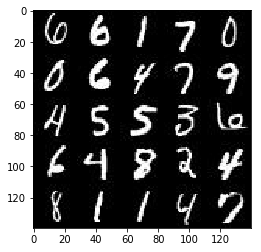

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

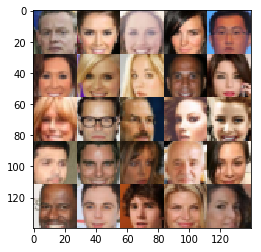

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    image_dim = (image_width, image_height, image_channels)
    input_real = tf.placeholder(tf.float32, shape=(None, *image_dim), name='input_real')
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, shape=None, name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.01
        
        conv1 = tf.layers.conv2d(images, filters=128, kernel_size=5, strides=2, padding='same')
        lrelu1 = tf.maximum(alpha * conv1, conv1)
        
        conv2 = tf.layers.conv2d(lrelu1, filters=256, kernel_size=5, strides=2, padding='same')
        bnorm1 = tf.layers.batch_normalization(conv2, training=True)
        lrelu2 = tf.maximum(alpha * bnorm1, bnorm1)
        
        conv3 = tf.layers.conv2d(lrelu2, filters=512, kernel_size=5, strides=2, padding='same')
        bnorm2 = tf.layers.batch_normalization(conv3, training=True)
        lrelu3 = tf.maximum(alpha * bnorm2, bnorm2)
        
        flat = tf.reshape(lrelu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function

    if is_train==True:
        reuse = False
    else:
        reuse = True    

    with tf.variable_scope('generator', reuse=reuse):
        
        alpha = 0.01
    
        fcon1 = tf.layers.dense(z, 2*2*512)
        flat = tf.reshape(fcon1, (-1, 2, 2, 512))
        bnorm1 = tf.layers.batch_normalization(flat, training=is_train)
        lrelu1 = tf.maximum(alpha * bnorm1, bnorm1)
    
        ctran1 = tf.layers.conv2d_transpose(lrelu1, 256, kernel_size=5, strides=2, padding='valid')
        bnorm2 = tf.layers.batch_normalization(ctran1, training=is_train)
        lrelu2 = tf.maximum(alpha * bnorm2, bnorm2)
    
        ctran2 = tf.layers.conv2d_transpose(lrelu2, 128, kernel_size=5, strides=2, padding='same')
        bnorm3 = tf.layers.batch_normalization(ctran2, training=is_train)
        lrelu3 = tf.maximum(alpha * bnorm3, bnorm3)
    
        logits = tf.layers.conv2d_transpose(lrelu3, out_channel_dim, kernel_size=5, strides=2, padding='same')
        output = tf.tanh(logits)
    
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    gen_output = generator(input_z, out_channel_dim)
    disc_output_real, disc_logits_real = discriminator(input_real)
    disc_output_fake, disc_logits_fake = discriminator(gen_output, reuse=True)

    disc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=disc_logits_real, labels=tf.ones_like(disc_output_real) * (1 - smooth)))
    disc_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=disc_logits_fake, labels=tf.zeros_like(disc_output_fake) + (smooth)))
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=disc_logits_fake, labels=tf.ones_like(disc_output_fake)))

    disc_loss = disc_loss_real + disc_loss_fake

    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    train_vars = tf.trainable_variables()
    disc_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    gen_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        disc_train_op = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=disc_vars)
        gen_train_op = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
    return disc_train_op, gen_train_op


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    image_width, image_height, image_channels = data_shape[1], data_shape[2], data_shape[3]
    
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    batch = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch += 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                #Since the generator output uses tanh(-1 & 1) in the last layer, the real input needs to be normalized
                #to be between -1 & 1 since MNIST and CelebA datasets are in -0.5 to 0.5 range 
                batch_images = batch_images * 2

                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})

                if batch % 10 == 0:
                    disc_loss = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    gen_loss = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}, batch {}".format(epoch_i+1, epochs, batch),
                          "Discriminator Loss: {:.4f}, ".format(disc_loss),
                          "Generator Loss: {:.4f}".format(gen_loss))

                if batch % 100 == 0:
                    show_generator_output(sess, show_n_images, input_z, image_channels, data_image_mode)               
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2, batch 10 Discriminator Loss: 2.1967,  Generator Loss: 4.5882
Epoch 1/2, batch 20 Discriminator Loss: 2.7760,  Generator Loss: 4.5301
Epoch 1/2, batch 30 Discriminator Loss: 1.5928,  Generator Loss: 5.9672
Epoch 1/2, batch 40 Discriminator Loss: 1.0833,  Generator Loss: 0.7066
Epoch 1/2, batch 50 Discriminator Loss: 2.2926,  Generator Loss: 11.1107
Epoch 1/2, batch 60 Discriminator Loss: 0.7328,  Generator Loss: 2.8759
Epoch 1/2, batch 70 Discriminator Loss: 0.9778,  Generator Loss: 0.9055
Epoch 1/2, batch 80 Discriminator Loss: 1.3641,  Generator Loss: 6.5240
Epoch 1/2, batch 90 Discriminator Loss: 0.8424,  Generator Loss: 3.5985
Epoch 1/2, batch 100 Discriminator Loss: 1.1879,  Generator Loss: 0.5974


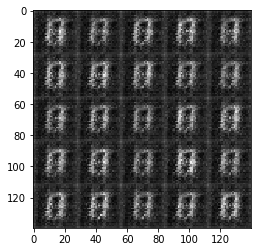

Epoch 1/2, batch 110 Discriminator Loss: 1.3640,  Generator Loss: 7.7962
Epoch 1/2, batch 120 Discriminator Loss: 0.7312,  Generator Loss: 3.0614
Epoch 1/2, batch 130 Discriminator Loss: 1.6327,  Generator Loss: 0.3061
Epoch 1/2, batch 140 Discriminator Loss: 1.6104,  Generator Loss: 8.7052
Epoch 1/2, batch 150 Discriminator Loss: 0.6771,  Generator Loss: 2.4169
Epoch 1/2, batch 160 Discriminator Loss: 1.3590,  Generator Loss: 0.4343
Epoch 1/2, batch 170 Discriminator Loss: 1.2294,  Generator Loss: 0.5348
Epoch 1/2, batch 180 Discriminator Loss: 1.4086,  Generator Loss: 6.7945
Epoch 1/2, batch 190 Discriminator Loss: 1.3111,  Generator Loss: 0.4645
Epoch 1/2, batch 200 Discriminator Loss: 1.4529,  Generator Loss: 7.4247


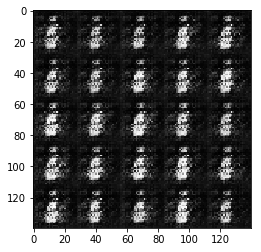

Epoch 1/2, batch 210 Discriminator Loss: 0.7902,  Generator Loss: 1.3140
Epoch 1/2, batch 220 Discriminator Loss: 0.7452,  Generator Loss: 1.6540
Epoch 1/2, batch 230 Discriminator Loss: 0.6889,  Generator Loss: 2.1275
Epoch 1/2, batch 240 Discriminator Loss: 0.7437,  Generator Loss: 2.3161
Epoch 1/2, batch 250 Discriminator Loss: 0.7418,  Generator Loss: 2.8486
Epoch 1/2, batch 260 Discriminator Loss: 1.4275,  Generator Loss: 6.0439
Epoch 1/2, batch 270 Discriminator Loss: 0.7856,  Generator Loss: 3.3407
Epoch 1/2, batch 280 Discriminator Loss: 0.7913,  Generator Loss: 1.4692
Epoch 1/2, batch 290 Discriminator Loss: 0.7265,  Generator Loss: 2.0328
Epoch 1/2, batch 300 Discriminator Loss: 0.8755,  Generator Loss: 2.6794


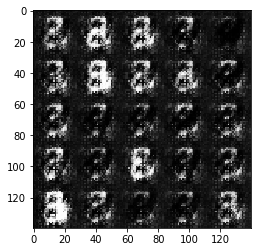

Epoch 1/2, batch 310 Discriminator Loss: 0.7648,  Generator Loss: 1.5655
Epoch 1/2, batch 320 Discriminator Loss: 0.7692,  Generator Loss: 1.9219
Epoch 1/2, batch 330 Discriminator Loss: 1.2657,  Generator Loss: 3.6326
Epoch 1/2, batch 340 Discriminator Loss: 1.3620,  Generator Loss: 4.4011
Epoch 1/2, batch 350 Discriminator Loss: 0.8314,  Generator Loss: 1.1769
Epoch 1/2, batch 360 Discriminator Loss: 0.8431,  Generator Loss: 2.3754
Epoch 1/2, batch 370 Discriminator Loss: 1.0377,  Generator Loss: 3.4149
Epoch 1/2, batch 380 Discriminator Loss: 0.9285,  Generator Loss: 2.6018
Epoch 1/2, batch 390 Discriminator Loss: 0.9198,  Generator Loss: 2.5171
Epoch 1/2, batch 400 Discriminator Loss: 0.9117,  Generator Loss: 1.7178


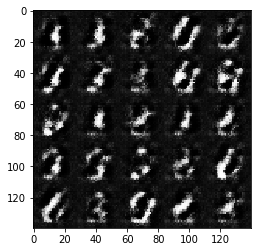

Epoch 1/2, batch 410 Discriminator Loss: 0.9374,  Generator Loss: 2.2427
Epoch 1/2, batch 420 Discriminator Loss: 0.8652,  Generator Loss: 2.0172
Epoch 1/2, batch 430 Discriminator Loss: 0.9196,  Generator Loss: 1.0195
Epoch 1/2, batch 440 Discriminator Loss: 1.3207,  Generator Loss: 3.1099
Epoch 1/2, batch 450 Discriminator Loss: 0.9217,  Generator Loss: 1.0374
Epoch 1/2, batch 460 Discriminator Loss: 0.8200,  Generator Loss: 1.6068
Epoch 1/2, batch 470 Discriminator Loss: 0.8689,  Generator Loss: 1.3664
Epoch 1/2, batch 480 Discriminator Loss: 1.2385,  Generator Loss: 2.5159
Epoch 1/2, batch 490 Discriminator Loss: 0.9389,  Generator Loss: 1.9242
Epoch 1/2, batch 500 Discriminator Loss: 0.8310,  Generator Loss: 1.6527


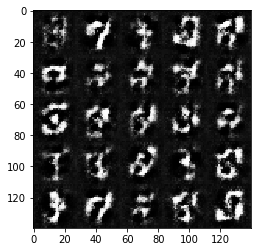

Epoch 1/2, batch 510 Discriminator Loss: 0.8276,  Generator Loss: 1.1985
Epoch 1/2, batch 520 Discriminator Loss: 0.9649,  Generator Loss: 0.8850
Epoch 1/2, batch 530 Discriminator Loss: 1.4053,  Generator Loss: 0.4325
Epoch 1/2, batch 540 Discriminator Loss: 1.3556,  Generator Loss: 0.5956
Epoch 1/2, batch 550 Discriminator Loss: 0.8580,  Generator Loss: 1.0892
Epoch 1/2, batch 560 Discriminator Loss: 0.8632,  Generator Loss: 1.0584
Epoch 1/2, batch 570 Discriminator Loss: 0.7878,  Generator Loss: 1.3130
Epoch 1/2, batch 580 Discriminator Loss: 1.2495,  Generator Loss: 0.5506
Epoch 1/2, batch 590 Discriminator Loss: 1.3712,  Generator Loss: 0.4601
Epoch 1/2, batch 600 Discriminator Loss: 0.8021,  Generator Loss: 1.2790


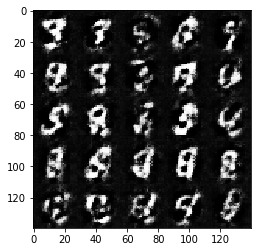

Epoch 1/2, batch 610 Discriminator Loss: 0.7815,  Generator Loss: 1.4706
Epoch 1/2, batch 620 Discriminator Loss: 0.8531,  Generator Loss: 1.7678
Epoch 1/2, batch 630 Discriminator Loss: 1.0757,  Generator Loss: 0.7624
Epoch 1/2, batch 640 Discriminator Loss: 1.5412,  Generator Loss: 0.4142
Epoch 1/2, batch 650 Discriminator Loss: 1.0291,  Generator Loss: 0.7385
Epoch 1/2, batch 660 Discriminator Loss: 1.1130,  Generator Loss: 0.6846
Epoch 1/2, batch 670 Discriminator Loss: 0.7675,  Generator Loss: 1.4796
Epoch 1/2, batch 680 Discriminator Loss: 0.9730,  Generator Loss: 2.5947
Epoch 1/2, batch 690 Discriminator Loss: 0.9060,  Generator Loss: 2.2741
Epoch 1/2, batch 700 Discriminator Loss: 0.8314,  Generator Loss: 1.9855


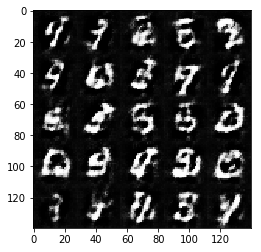

Epoch 1/2, batch 710 Discriminator Loss: 0.9639,  Generator Loss: 0.8586
Epoch 1/2, batch 720 Discriminator Loss: 0.9227,  Generator Loss: 1.9742
Epoch 1/2, batch 730 Discriminator Loss: 0.8453,  Generator Loss: 1.4137
Epoch 1/2, batch 740 Discriminator Loss: 0.8467,  Generator Loss: 1.6714
Epoch 1/2, batch 750 Discriminator Loss: 1.4594,  Generator Loss: 0.4261
Epoch 1/2, batch 760 Discriminator Loss: 1.2722,  Generator Loss: 0.5277
Epoch 1/2, batch 770 Discriminator Loss: 1.2510,  Generator Loss: 0.5525
Epoch 1/2, batch 780 Discriminator Loss: 0.8025,  Generator Loss: 1.4531
Epoch 1/2, batch 790 Discriminator Loss: 0.8704,  Generator Loss: 1.9600
Epoch 1/2, batch 800 Discriminator Loss: 1.0731,  Generator Loss: 2.3650


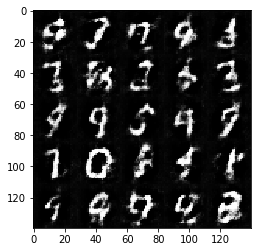

Epoch 1/2, batch 810 Discriminator Loss: 0.9103,  Generator Loss: 0.9561
Epoch 1/2, batch 820 Discriminator Loss: 1.5514,  Generator Loss: 0.3749
Epoch 1/2, batch 830 Discriminator Loss: 0.9100,  Generator Loss: 1.0608
Epoch 1/2, batch 840 Discriminator Loss: 1.2923,  Generator Loss: 0.5481
Epoch 1/2, batch 850 Discriminator Loss: 0.9342,  Generator Loss: 0.9327
Epoch 1/2, batch 860 Discriminator Loss: 0.7752,  Generator Loss: 1.5632
Epoch 1/2, batch 870 Discriminator Loss: 0.9193,  Generator Loss: 0.9487
Epoch 1/2, batch 880 Discriminator Loss: 1.5431,  Generator Loss: 3.4333
Epoch 1/2, batch 890 Discriminator Loss: 0.9040,  Generator Loss: 1.0735
Epoch 1/2, batch 900 Discriminator Loss: 1.0133,  Generator Loss: 2.2029


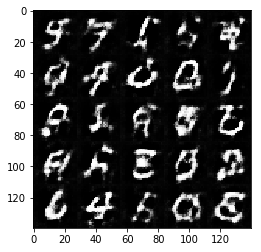

Epoch 1/2, batch 910 Discriminator Loss: 0.9463,  Generator Loss: 0.8727
Epoch 1/2, batch 920 Discriminator Loss: 0.9075,  Generator Loss: 0.9779
Epoch 1/2, batch 930 Discriminator Loss: 0.9146,  Generator Loss: 0.9503
Epoch 1/2, batch 940 Discriminator Loss: 0.9547,  Generator Loss: 1.8165
Epoch 1/2, batch 950 Discriminator Loss: 1.2998,  Generator Loss: 2.2888
Epoch 1/2, batch 960 Discriminator Loss: 0.8835,  Generator Loss: 1.8254
Epoch 1/2, batch 970 Discriminator Loss: 1.1990,  Generator Loss: 0.5941
Epoch 1/2, batch 980 Discriminator Loss: 1.0491,  Generator Loss: 2.1840
Epoch 1/2, batch 990 Discriminator Loss: 0.9294,  Generator Loss: 1.1642
Epoch 1/2, batch 1000 Discriminator Loss: 0.8731,  Generator Loss: 1.1203


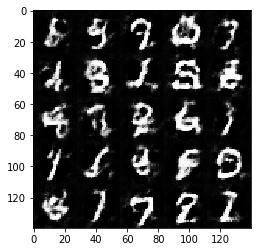

Epoch 1/2, batch 1010 Discriminator Loss: 1.2896,  Generator Loss: 2.6383
Epoch 1/2, batch 1020 Discriminator Loss: 0.8805,  Generator Loss: 1.1323
Epoch 1/2, batch 1030 Discriminator Loss: 0.9745,  Generator Loss: 2.1220
Epoch 1/2, batch 1040 Discriminator Loss: 1.1274,  Generator Loss: 0.6582
Epoch 1/2, batch 1050 Discriminator Loss: 1.0052,  Generator Loss: 0.8353
Epoch 1/2, batch 1060 Discriminator Loss: 0.9705,  Generator Loss: 1.5450
Epoch 1/2, batch 1070 Discriminator Loss: 0.9394,  Generator Loss: 1.7236
Epoch 1/2, batch 1080 Discriminator Loss: 1.3884,  Generator Loss: 0.4347
Epoch 1/2, batch 1090 Discriminator Loss: 1.1019,  Generator Loss: 0.6849
Epoch 1/2, batch 1100 Discriminator Loss: 1.1576,  Generator Loss: 0.6273


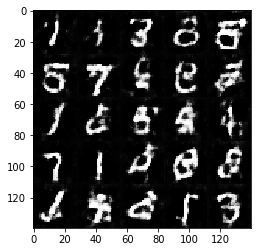

Epoch 1/2, batch 1110 Discriminator Loss: 1.5646,  Generator Loss: 0.3609
Epoch 1/2, batch 1120 Discriminator Loss: 1.0490,  Generator Loss: 0.7918
Epoch 1/2, batch 1130 Discriminator Loss: 1.1603,  Generator Loss: 0.6165
Epoch 1/2, batch 1140 Discriminator Loss: 1.4687,  Generator Loss: 0.4391
Epoch 1/2, batch 1150 Discriminator Loss: 1.0054,  Generator Loss: 0.7872
Epoch 1/2, batch 1160 Discriminator Loss: 0.8979,  Generator Loss: 1.2481
Epoch 1/2, batch 1170 Discriminator Loss: 1.0060,  Generator Loss: 0.8094
Epoch 1/2, batch 1180 Discriminator Loss: 0.9203,  Generator Loss: 0.9356
Epoch 1/2, batch 1190 Discriminator Loss: 0.9937,  Generator Loss: 0.8146
Epoch 1/2, batch 1200 Discriminator Loss: 1.3792,  Generator Loss: 0.5023


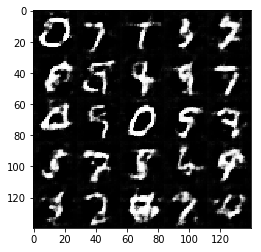

Epoch 1/2, batch 1210 Discriminator Loss: 0.9914,  Generator Loss: 1.1545
Epoch 1/2, batch 1220 Discriminator Loss: 0.9163,  Generator Loss: 1.2639
Epoch 1/2, batch 1230 Discriminator Loss: 0.9925,  Generator Loss: 0.8012
Epoch 1/2, batch 1240 Discriminator Loss: 1.1371,  Generator Loss: 2.2919
Epoch 1/2, batch 1250 Discriminator Loss: 0.9312,  Generator Loss: 1.1162
Epoch 1/2, batch 1260 Discriminator Loss: 0.9215,  Generator Loss: 1.0278
Epoch 1/2, batch 1270 Discriminator Loss: 1.7720,  Generator Loss: 0.2771
Epoch 1/2, batch 1280 Discriminator Loss: 1.1109,  Generator Loss: 0.7000
Epoch 1/2, batch 1290 Discriminator Loss: 0.8775,  Generator Loss: 1.1374
Epoch 1/2, batch 1300 Discriminator Loss: 1.0061,  Generator Loss: 2.2371


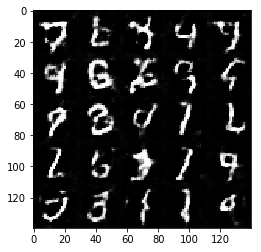

Epoch 1/2, batch 1310 Discriminator Loss: 1.0689,  Generator Loss: 0.9526
Epoch 1/2, batch 1320 Discriminator Loss: 1.5687,  Generator Loss: 0.3723
Epoch 1/2, batch 1330 Discriminator Loss: 1.1635,  Generator Loss: 0.6183
Epoch 1/2, batch 1340 Discriminator Loss: 1.0195,  Generator Loss: 2.0113
Epoch 1/2, batch 1350 Discriminator Loss: 0.8733,  Generator Loss: 1.3689
Epoch 1/2, batch 1360 Discriminator Loss: 0.9068,  Generator Loss: 1.2057
Epoch 1/2, batch 1370 Discriminator Loss: 1.2498,  Generator Loss: 2.5285
Epoch 1/2, batch 1380 Discriminator Loss: 0.9166,  Generator Loss: 1.3406
Epoch 1/2, batch 1390 Discriminator Loss: 1.1707,  Generator Loss: 0.5674
Epoch 1/2, batch 1400 Discriminator Loss: 1.2561,  Generator Loss: 0.5198


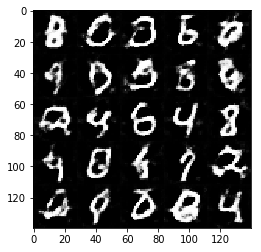

Epoch 1/2, batch 1410 Discriminator Loss: 1.0329,  Generator Loss: 0.7808
Epoch 1/2, batch 1420 Discriminator Loss: 0.9551,  Generator Loss: 2.0418
Epoch 1/2, batch 1430 Discriminator Loss: 1.3296,  Generator Loss: 0.4959
Epoch 1/2, batch 1440 Discriminator Loss: 1.0047,  Generator Loss: 0.8308
Epoch 1/2, batch 1450 Discriminator Loss: 1.3607,  Generator Loss: 0.4679
Epoch 1/2, batch 1460 Discriminator Loss: 1.4750,  Generator Loss: 0.4160
Epoch 1/2, batch 1470 Discriminator Loss: 0.9895,  Generator Loss: 0.8777
Epoch 1/2, batch 1480 Discriminator Loss: 0.8573,  Generator Loss: 1.7580
Epoch 1/2, batch 1490 Discriminator Loss: 1.0293,  Generator Loss: 2.0284
Epoch 1/2, batch 1500 Discriminator Loss: 0.8368,  Generator Loss: 1.2086


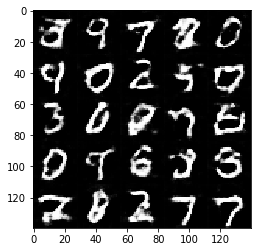

Epoch 1/2, batch 1510 Discriminator Loss: 0.9833,  Generator Loss: 1.9615
Epoch 1/2, batch 1520 Discriminator Loss: 0.8960,  Generator Loss: 1.0643
Epoch 1/2, batch 1530 Discriminator Loss: 0.8997,  Generator Loss: 1.5155
Epoch 1/2, batch 1540 Discriminator Loss: 0.9075,  Generator Loss: 1.2776
Epoch 1/2, batch 1550 Discriminator Loss: 1.0646,  Generator Loss: 0.7024
Epoch 1/2, batch 1560 Discriminator Loss: 1.1250,  Generator Loss: 0.6813
Epoch 1/2, batch 1570 Discriminator Loss: 1.5409,  Generator Loss: 0.4512
Epoch 1/2, batch 1580 Discriminator Loss: 0.9869,  Generator Loss: 0.8364
Epoch 1/2, batch 1590 Discriminator Loss: 1.0317,  Generator Loss: 0.8437
Epoch 1/2, batch 1600 Discriminator Loss: 1.2097,  Generator Loss: 0.5499


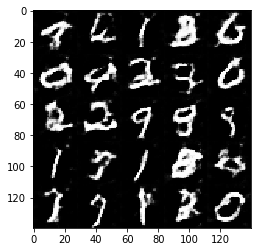

Epoch 1/2, batch 1610 Discriminator Loss: 1.0815,  Generator Loss: 0.6910
Epoch 1/2, batch 1620 Discriminator Loss: 1.6066,  Generator Loss: 0.3278
Epoch 1/2, batch 1630 Discriminator Loss: 0.8821,  Generator Loss: 1.1828
Epoch 1/2, batch 1640 Discriminator Loss: 0.8506,  Generator Loss: 1.1473
Epoch 1/2, batch 1650 Discriminator Loss: 0.9938,  Generator Loss: 0.8101
Epoch 1/2, batch 1660 Discriminator Loss: 1.1496,  Generator Loss: 0.6503
Epoch 1/2, batch 1670 Discriminator Loss: 0.9767,  Generator Loss: 0.8472
Epoch 1/2, batch 1680 Discriminator Loss: 0.9065,  Generator Loss: 0.9429
Epoch 1/2, batch 1690 Discriminator Loss: 1.5412,  Generator Loss: 0.4059
Epoch 1/2, batch 1700 Discriminator Loss: 0.9625,  Generator Loss: 0.8837


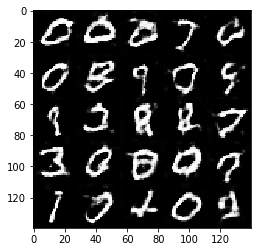

Epoch 1/2, batch 1710 Discriminator Loss: 1.2979,  Generator Loss: 0.4976
Epoch 1/2, batch 1720 Discriminator Loss: 1.0420,  Generator Loss: 0.7277
Epoch 1/2, batch 1730 Discriminator Loss: 0.8263,  Generator Loss: 1.2731
Epoch 1/2, batch 1740 Discriminator Loss: 1.0359,  Generator Loss: 0.7372
Epoch 1/2, batch 1750 Discriminator Loss: 0.9007,  Generator Loss: 1.1727
Epoch 1/2, batch 1760 Discriminator Loss: 0.8378,  Generator Loss: 1.9243
Epoch 1/2, batch 1770 Discriminator Loss: 1.2085,  Generator Loss: 0.5788
Epoch 1/2, batch 1780 Discriminator Loss: 1.0583,  Generator Loss: 0.7052
Epoch 1/2, batch 1790 Discriminator Loss: 1.0139,  Generator Loss: 0.8174
Epoch 1/2, batch 1800 Discriminator Loss: 0.9227,  Generator Loss: 0.9712


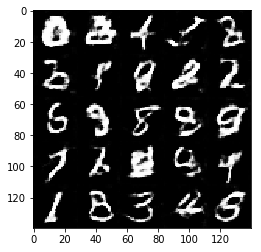

Epoch 1/2, batch 1810 Discriminator Loss: 1.0623,  Generator Loss: 0.7337
Epoch 1/2, batch 1820 Discriminator Loss: 0.8251,  Generator Loss: 1.6962
Epoch 1/2, batch 1830 Discriminator Loss: 0.8536,  Generator Loss: 1.1159
Epoch 1/2, batch 1840 Discriminator Loss: 1.1478,  Generator Loss: 0.6287
Epoch 1/2, batch 1850 Discriminator Loss: 1.1259,  Generator Loss: 0.6369
Epoch 1/2, batch 1860 Discriminator Loss: 1.0210,  Generator Loss: 0.7775
Epoch 1/2, batch 1870 Discriminator Loss: 0.8930,  Generator Loss: 1.0366
Epoch 2/2, batch 1880 Discriminator Loss: 0.8935,  Generator Loss: 1.3210
Epoch 2/2, batch 1890 Discriminator Loss: 1.2184,  Generator Loss: 0.5551
Epoch 2/2, batch 1900 Discriminator Loss: 1.3009,  Generator Loss: 0.5204


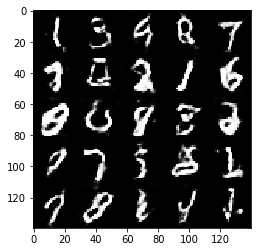

Epoch 2/2, batch 1910 Discriminator Loss: 0.8538,  Generator Loss: 1.1445
Epoch 2/2, batch 1920 Discriminator Loss: 1.3645,  Generator Loss: 0.4854
Epoch 2/2, batch 1930 Discriminator Loss: 1.1965,  Generator Loss: 0.5592
Epoch 2/2, batch 1940 Discriminator Loss: 0.9742,  Generator Loss: 1.6966
Epoch 2/2, batch 1950 Discriminator Loss: 1.1266,  Generator Loss: 1.8176
Epoch 2/2, batch 1960 Discriminator Loss: 1.0050,  Generator Loss: 0.7933
Epoch 2/2, batch 1970 Discriminator Loss: 1.1298,  Generator Loss: 0.6318
Epoch 2/2, batch 1980 Discriminator Loss: 1.0308,  Generator Loss: 0.7211
Epoch 2/2, batch 1990 Discriminator Loss: 1.6724,  Generator Loss: 0.3512
Epoch 2/2, batch 2000 Discriminator Loss: 0.8308,  Generator Loss: 1.2339


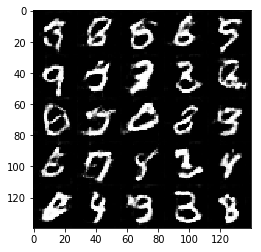

Epoch 2/2, batch 2010 Discriminator Loss: 1.5534,  Generator Loss: 0.3889
Epoch 2/2, batch 2020 Discriminator Loss: 1.1478,  Generator Loss: 0.6184
Epoch 2/2, batch 2030 Discriminator Loss: 1.0050,  Generator Loss: 0.8190
Epoch 2/2, batch 2040 Discriminator Loss: 0.9988,  Generator Loss: 0.8729
Epoch 2/2, batch 2050 Discriminator Loss: 1.4246,  Generator Loss: 0.4391
Epoch 2/2, batch 2060 Discriminator Loss: 1.5204,  Generator Loss: 0.4411
Epoch 2/2, batch 2070 Discriminator Loss: 1.0536,  Generator Loss: 0.7211
Epoch 2/2, batch 2080 Discriminator Loss: 2.2502,  Generator Loss: 0.1695
Epoch 2/2, batch 2090 Discriminator Loss: 0.9737,  Generator Loss: 0.8276
Epoch 2/2, batch 2100 Discriminator Loss: 1.0525,  Generator Loss: 0.7166


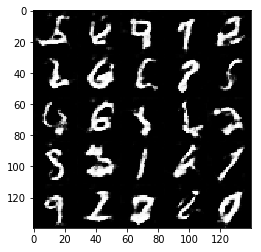

Epoch 2/2, batch 2110 Discriminator Loss: 0.8392,  Generator Loss: 1.5602
Epoch 2/2, batch 2120 Discriminator Loss: 0.9310,  Generator Loss: 0.8992
Epoch 2/2, batch 2130 Discriminator Loss: 1.0392,  Generator Loss: 0.7419
Epoch 2/2, batch 2140 Discriminator Loss: 1.5463,  Generator Loss: 0.3856
Epoch 2/2, batch 2150 Discriminator Loss: 1.3061,  Generator Loss: 0.5345
Epoch 2/2, batch 2160 Discriminator Loss: 1.0890,  Generator Loss: 0.6707
Epoch 2/2, batch 2170 Discriminator Loss: 0.9751,  Generator Loss: 0.8992
Epoch 2/2, batch 2180 Discriminator Loss: 0.9026,  Generator Loss: 0.9897
Epoch 2/2, batch 2190 Discriminator Loss: 0.9477,  Generator Loss: 0.8921
Epoch 2/2, batch 2200 Discriminator Loss: 0.8756,  Generator Loss: 1.3080


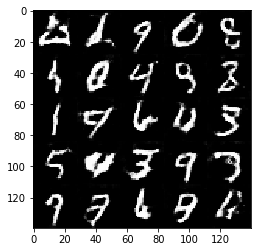

Epoch 2/2, batch 2210 Discriminator Loss: 0.9455,  Generator Loss: 0.9189
Epoch 2/2, batch 2220 Discriminator Loss: 0.8765,  Generator Loss: 1.5488
Epoch 2/2, batch 2230 Discriminator Loss: 0.9241,  Generator Loss: 0.9280
Epoch 2/2, batch 2240 Discriminator Loss: 1.0709,  Generator Loss: 0.7291
Epoch 2/2, batch 2250 Discriminator Loss: 0.8207,  Generator Loss: 1.4024
Epoch 2/2, batch 2260 Discriminator Loss: 1.0549,  Generator Loss: 0.7195
Epoch 2/2, batch 2270 Discriminator Loss: 1.2012,  Generator Loss: 0.6278
Epoch 2/2, batch 2280 Discriminator Loss: 1.7474,  Generator Loss: 0.2960
Epoch 2/2, batch 2290 Discriminator Loss: 0.9874,  Generator Loss: 0.8745
Epoch 2/2, batch 2300 Discriminator Loss: 1.0202,  Generator Loss: 0.7628


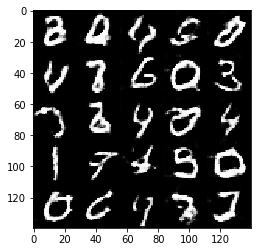

Epoch 2/2, batch 2310 Discriminator Loss: 1.0060,  Generator Loss: 0.7903
Epoch 2/2, batch 2320 Discriminator Loss: 1.0581,  Generator Loss: 0.7007
Epoch 2/2, batch 2330 Discriminator Loss: 1.1258,  Generator Loss: 0.6361
Epoch 2/2, batch 2340 Discriminator Loss: 1.6308,  Generator Loss: 0.3458
Epoch 2/2, batch 2350 Discriminator Loss: 0.8680,  Generator Loss: 1.1398
Epoch 2/2, batch 2360 Discriminator Loss: 0.8680,  Generator Loss: 1.1435
Epoch 2/2, batch 2370 Discriminator Loss: 0.7970,  Generator Loss: 1.3929
Epoch 2/2, batch 2380 Discriminator Loss: 1.1792,  Generator Loss: 0.6561
Epoch 2/2, batch 2390 Discriminator Loss: 1.1277,  Generator Loss: 2.5241
Epoch 2/2, batch 2400 Discriminator Loss: 1.1062,  Generator Loss: 0.6800


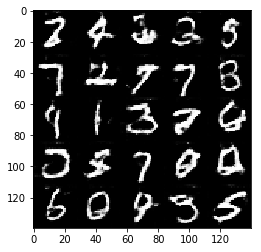

Epoch 2/2, batch 2410 Discriminator Loss: 0.8481,  Generator Loss: 1.1802
Epoch 2/2, batch 2420 Discriminator Loss: 1.1805,  Generator Loss: 0.6002
Epoch 2/2, batch 2430 Discriminator Loss: 1.2673,  Generator Loss: 0.5692
Epoch 2/2, batch 2440 Discriminator Loss: 0.9657,  Generator Loss: 1.9693
Epoch 2/2, batch 2450 Discriminator Loss: 0.8948,  Generator Loss: 0.9888
Epoch 2/2, batch 2460 Discriminator Loss: 0.8712,  Generator Loss: 1.0428
Epoch 2/2, batch 2470 Discriminator Loss: 0.8014,  Generator Loss: 1.3159
Epoch 2/2, batch 2480 Discriminator Loss: 0.8394,  Generator Loss: 1.0900
Epoch 2/2, batch 2490 Discriminator Loss: 0.8236,  Generator Loss: 1.3489
Epoch 2/2, batch 2500 Discriminator Loss: 0.8447,  Generator Loss: 1.1541


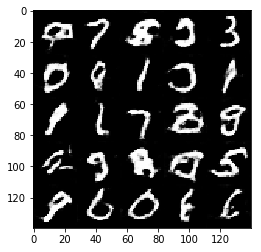

Epoch 2/2, batch 2510 Discriminator Loss: 0.9402,  Generator Loss: 0.8592
Epoch 2/2, batch 2520 Discriminator Loss: 1.2576,  Generator Loss: 2.2533
Epoch 2/2, batch 2530 Discriminator Loss: 1.0211,  Generator Loss: 0.8031
Epoch 2/2, batch 2540 Discriminator Loss: 1.0283,  Generator Loss: 0.7627
Epoch 2/2, batch 2550 Discriminator Loss: 1.3376,  Generator Loss: 0.4806
Epoch 2/2, batch 2560 Discriminator Loss: 0.9074,  Generator Loss: 1.0013
Epoch 2/2, batch 2570 Discriminator Loss: 1.6889,  Generator Loss: 0.3501
Epoch 2/2, batch 2580 Discriminator Loss: 1.0274,  Generator Loss: 0.7739
Epoch 2/2, batch 2590 Discriminator Loss: 0.8603,  Generator Loss: 1.0659
Epoch 2/2, batch 2600 Discriminator Loss: 1.0406,  Generator Loss: 0.7503


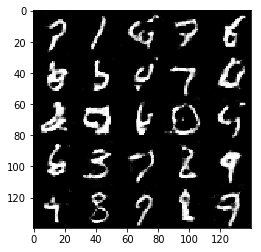

Epoch 2/2, batch 2610 Discriminator Loss: 0.9019,  Generator Loss: 1.1590
Epoch 2/2, batch 2620 Discriminator Loss: 1.1390,  Generator Loss: 0.6497
Epoch 2/2, batch 2630 Discriminator Loss: 0.8615,  Generator Loss: 1.1508
Epoch 2/2, batch 2640 Discriminator Loss: 1.0441,  Generator Loss: 2.6786
Epoch 2/2, batch 2650 Discriminator Loss: 0.8659,  Generator Loss: 1.2022
Epoch 2/2, batch 2660 Discriminator Loss: 1.2376,  Generator Loss: 0.5505
Epoch 2/2, batch 2670 Discriminator Loss: 0.8591,  Generator Loss: 1.2387
Epoch 2/2, batch 2680 Discriminator Loss: 1.4664,  Generator Loss: 0.4308
Epoch 2/2, batch 2690 Discriminator Loss: 0.8230,  Generator Loss: 1.2020
Epoch 2/2, batch 2700 Discriminator Loss: 0.9973,  Generator Loss: 0.7805


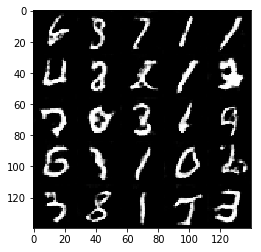

Epoch 2/2, batch 2710 Discriminator Loss: 0.9267,  Generator Loss: 0.9096
Epoch 2/2, batch 2720 Discriminator Loss: 0.8574,  Generator Loss: 1.1752
Epoch 2/2, batch 2730 Discriminator Loss: 1.3005,  Generator Loss: 0.5432
Epoch 2/2, batch 2740 Discriminator Loss: 0.8638,  Generator Loss: 1.4435
Epoch 2/2, batch 2750 Discriminator Loss: 1.3101,  Generator Loss: 0.5142
Epoch 2/2, batch 2760 Discriminator Loss: 1.3588,  Generator Loss: 0.4883
Epoch 2/2, batch 2770 Discriminator Loss: 0.9193,  Generator Loss: 0.9245
Epoch 2/2, batch 2780 Discriminator Loss: 1.1880,  Generator Loss: 0.5936
Epoch 2/2, batch 2790 Discriminator Loss: 1.1966,  Generator Loss: 0.5919
Epoch 2/2, batch 2800 Discriminator Loss: 1.2600,  Generator Loss: 0.5240


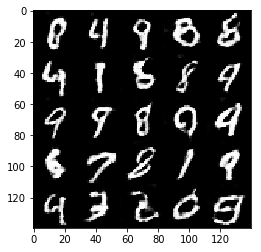

Epoch 2/2, batch 2810 Discriminator Loss: 1.9129,  Generator Loss: 0.2677
Epoch 2/2, batch 2820 Discriminator Loss: 1.2721,  Generator Loss: 0.5081
Epoch 2/2, batch 2830 Discriminator Loss: 0.8763,  Generator Loss: 1.3627
Epoch 2/2, batch 2840 Discriminator Loss: 0.7756,  Generator Loss: 1.9312
Epoch 2/2, batch 2850 Discriminator Loss: 1.0860,  Generator Loss: 0.6682
Epoch 2/2, batch 2860 Discriminator Loss: 0.8899,  Generator Loss: 0.9894
Epoch 2/2, batch 2870 Discriminator Loss: 0.8025,  Generator Loss: 1.2611
Epoch 2/2, batch 2880 Discriminator Loss: 1.2391,  Generator Loss: 0.5297
Epoch 2/2, batch 2890 Discriminator Loss: 1.2404,  Generator Loss: 0.6099
Epoch 2/2, batch 2900 Discriminator Loss: 0.8781,  Generator Loss: 1.0045


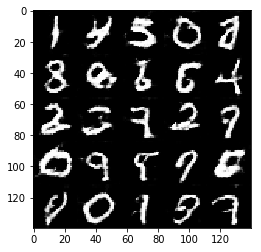

Epoch 2/2, batch 2910 Discriminator Loss: 0.9953,  Generator Loss: 0.8243
Epoch 2/2, batch 2920 Discriminator Loss: 0.7639,  Generator Loss: 1.3589
Epoch 2/2, batch 2930 Discriminator Loss: 0.9336,  Generator Loss: 0.9124
Epoch 2/2, batch 2940 Discriminator Loss: 1.0653,  Generator Loss: 0.7203
Epoch 2/2, batch 2950 Discriminator Loss: 1.2963,  Generator Loss: 0.5101
Epoch 2/2, batch 2960 Discriminator Loss: 0.8927,  Generator Loss: 1.1146
Epoch 2/2, batch 2970 Discriminator Loss: 0.7661,  Generator Loss: 1.7562
Epoch 2/2, batch 2980 Discriminator Loss: 1.3540,  Generator Loss: 0.5248
Epoch 2/2, batch 2990 Discriminator Loss: 1.0501,  Generator Loss: 0.8281
Epoch 2/2, batch 3000 Discriminator Loss: 1.0541,  Generator Loss: 0.7519


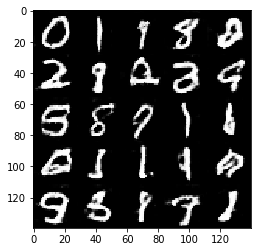

Epoch 2/2, batch 3010 Discriminator Loss: 1.2791,  Generator Loss: 0.5184
Epoch 2/2, batch 3020 Discriminator Loss: 1.2865,  Generator Loss: 0.5242
Epoch 2/2, batch 3030 Discriminator Loss: 0.8395,  Generator Loss: 1.9185
Epoch 2/2, batch 3040 Discriminator Loss: 1.0541,  Generator Loss: 0.7477
Epoch 2/2, batch 3050 Discriminator Loss: 2.1584,  Generator Loss: 0.1909
Epoch 2/2, batch 3060 Discriminator Loss: 1.1339,  Generator Loss: 0.6472
Epoch 2/2, batch 3070 Discriminator Loss: 0.8036,  Generator Loss: 1.3458
Epoch 2/2, batch 3080 Discriminator Loss: 0.8758,  Generator Loss: 1.1909
Epoch 2/2, batch 3090 Discriminator Loss: 0.9171,  Generator Loss: 2.1536
Epoch 2/2, batch 3100 Discriminator Loss: 0.8416,  Generator Loss: 1.2145


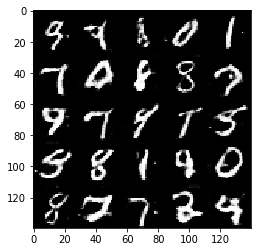

Epoch 2/2, batch 3110 Discriminator Loss: 0.9595,  Generator Loss: 0.8489
Epoch 2/2, batch 3120 Discriminator Loss: 0.8165,  Generator Loss: 1.2243
Epoch 2/2, batch 3130 Discriminator Loss: 0.9907,  Generator Loss: 0.8219
Epoch 2/2, batch 3140 Discriminator Loss: 0.8989,  Generator Loss: 0.9734
Epoch 2/2, batch 3150 Discriminator Loss: 0.8807,  Generator Loss: 0.9991
Epoch 2/2, batch 3160 Discriminator Loss: 0.7969,  Generator Loss: 1.8399
Epoch 2/2, batch 3170 Discriminator Loss: 1.1014,  Generator Loss: 0.7081
Epoch 2/2, batch 3180 Discriminator Loss: 0.9075,  Generator Loss: 0.9976
Epoch 2/2, batch 3190 Discriminator Loss: 2.1895,  Generator Loss: 0.2424
Epoch 2/2, batch 3200 Discriminator Loss: 0.8417,  Generator Loss: 1.3171


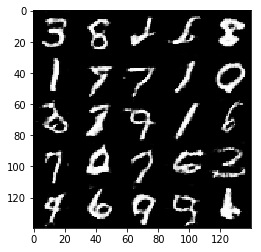

Epoch 2/2, batch 3210 Discriminator Loss: 0.9510,  Generator Loss: 0.9258
Epoch 2/2, batch 3220 Discriminator Loss: 0.8928,  Generator Loss: 1.1323
Epoch 2/2, batch 3230 Discriminator Loss: 0.9427,  Generator Loss: 1.6124
Epoch 2/2, batch 3240 Discriminator Loss: 1.3154,  Generator Loss: 0.5097
Epoch 2/2, batch 3250 Discriminator Loss: 1.0677,  Generator Loss: 0.7384
Epoch 2/2, batch 3260 Discriminator Loss: 0.8277,  Generator Loss: 1.1384
Epoch 2/2, batch 3270 Discriminator Loss: 1.4514,  Generator Loss: 0.4282
Epoch 2/2, batch 3280 Discriminator Loss: 0.9456,  Generator Loss: 0.8796
Epoch 2/2, batch 3290 Discriminator Loss: 0.9219,  Generator Loss: 0.9244
Epoch 2/2, batch 3300 Discriminator Loss: 1.1906,  Generator Loss: 0.5793


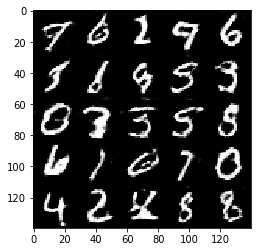

Epoch 2/2, batch 3310 Discriminator Loss: 0.9543,  Generator Loss: 0.8621
Epoch 2/2, batch 3320 Discriminator Loss: 0.9831,  Generator Loss: 0.8143
Epoch 2/2, batch 3330 Discriminator Loss: 1.0888,  Generator Loss: 0.7430
Epoch 2/2, batch 3340 Discriminator Loss: 1.3350,  Generator Loss: 0.4841
Epoch 2/2, batch 3350 Discriminator Loss: 0.8489,  Generator Loss: 1.1004
Epoch 2/2, batch 3360 Discriminator Loss: 0.8948,  Generator Loss: 1.0299
Epoch 2/2, batch 3370 Discriminator Loss: 1.0662,  Generator Loss: 0.7129
Epoch 2/2, batch 3380 Discriminator Loss: 0.8178,  Generator Loss: 1.1324
Epoch 2/2, batch 3390 Discriminator Loss: 1.5689,  Generator Loss: 0.3880
Epoch 2/2, batch 3400 Discriminator Loss: 0.9145,  Generator Loss: 1.1957


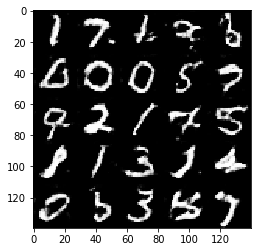

Epoch 2/2, batch 3410 Discriminator Loss: 1.0581,  Generator Loss: 0.7497
Epoch 2/2, batch 3420 Discriminator Loss: 0.8746,  Generator Loss: 1.0194
Epoch 2/2, batch 3430 Discriminator Loss: 1.0031,  Generator Loss: 0.8050
Epoch 2/2, batch 3440 Discriminator Loss: 0.8421,  Generator Loss: 1.1553
Epoch 2/2, batch 3450 Discriminator Loss: 1.0328,  Generator Loss: 0.7433
Epoch 2/2, batch 3460 Discriminator Loss: 0.9037,  Generator Loss: 0.9766
Epoch 2/2, batch 3470 Discriminator Loss: 0.7705,  Generator Loss: 1.5477
Epoch 2/2, batch 3480 Discriminator Loss: 0.9444,  Generator Loss: 0.8870
Epoch 2/2, batch 3490 Discriminator Loss: 0.7764,  Generator Loss: 1.7748
Epoch 2/2, batch 3500 Discriminator Loss: 1.0842,  Generator Loss: 2.6891


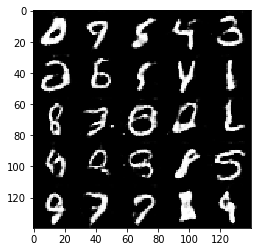

Epoch 2/2, batch 3510 Discriminator Loss: 0.9977,  Generator Loss: 1.9755
Epoch 2/2, batch 3520 Discriminator Loss: 0.8174,  Generator Loss: 1.6148
Epoch 2/2, batch 3530 Discriminator Loss: 0.8978,  Generator Loss: 2.0729
Epoch 2/2, batch 3540 Discriminator Loss: 1.0270,  Generator Loss: 0.7600
Epoch 2/2, batch 3550 Discriminator Loss: 0.8531,  Generator Loss: 1.0474
Epoch 2/2, batch 3560 Discriminator Loss: 0.9042,  Generator Loss: 0.9313
Epoch 2/2, batch 3570 Discriminator Loss: 0.8481,  Generator Loss: 1.0614
Epoch 2/2, batch 3580 Discriminator Loss: 0.8508,  Generator Loss: 1.0706
Epoch 2/2, batch 3590 Discriminator Loss: 0.8536,  Generator Loss: 1.0395
Epoch 2/2, batch 3600 Discriminator Loss: 0.7970,  Generator Loss: 1.5489


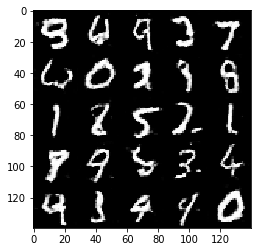

Epoch 2/2, batch 3610 Discriminator Loss: 1.3098,  Generator Loss: 0.4938
Epoch 2/2, batch 3620 Discriminator Loss: 0.8014,  Generator Loss: 1.2304
Epoch 2/2, batch 3630 Discriminator Loss: 1.1661,  Generator Loss: 0.6650
Epoch 2/2, batch 3640 Discriminator Loss: 0.8683,  Generator Loss: 1.0315
Epoch 2/2, batch 3650 Discriminator Loss: 0.8893,  Generator Loss: 1.0139
Epoch 2/2, batch 3660 Discriminator Loss: 0.7516,  Generator Loss: 1.9923
Epoch 2/2, batch 3670 Discriminator Loss: 0.8785,  Generator Loss: 1.0292
Epoch 2/2, batch 3680 Discriminator Loss: 1.2350,  Generator Loss: 0.5909
Epoch 2/2, batch 3690 Discriminator Loss: 1.0072,  Generator Loss: 0.7938
Epoch 2/2, batch 3700 Discriminator Loss: 0.8703,  Generator Loss: 0.9970


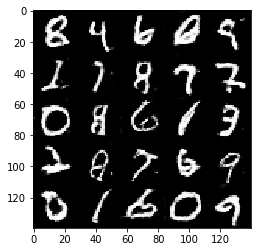

Epoch 2/2, batch 3710 Discriminator Loss: 0.8466,  Generator Loss: 1.9155
Epoch 2/2, batch 3720 Discriminator Loss: 0.7731,  Generator Loss: 1.8486
Epoch 2/2, batch 3730 Discriminator Loss: 0.8134,  Generator Loss: 1.2163
Epoch 2/2, batch 3740 Discriminator Loss: 0.8956,  Generator Loss: 0.9487
Epoch 2/2, batch 3750 Discriminator Loss: 1.0725,  Generator Loss: 0.6905


In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1, batch 10 Discriminator Loss: 1.8563,  Generator Loss: 0.2490
Epoch 1/1, batch 20 Discriminator Loss: 1.8925,  Generator Loss: 0.2438
Epoch 1/1, batch 30 Discriminator Loss: 2.9962,  Generator Loss: 8.7209
Epoch 1/1, batch 40 Discriminator Loss: 2.6672,  Generator Loss: 9.6151
Epoch 1/1, batch 50 Discriminator Loss: 0.7991,  Generator Loss: 3.9410
Epoch 1/1, batch 60 Discriminator Loss: 2.7651,  Generator Loss: 12.6324
Epoch 1/1, batch 70 Discriminator Loss: 0.9411,  Generator Loss: 4.7271
Epoch 1/1, batch 80 Discriminator Loss: 0.6942,  Generator Loss: 2.1689
Epoch 1/1, batch 90 Discriminator Loss: 1.0634,  Generator Loss: 0.6992
Epoch 1/1, batch 100 Discriminator Loss: 1.6363,  Generator Loss: 0.3162


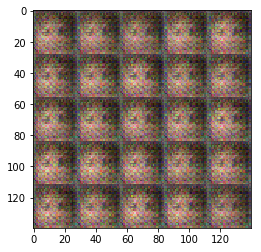

Epoch 1/1, batch 110 Discriminator Loss: 1.7259,  Generator Loss: 9.9600
Epoch 1/1, batch 120 Discriminator Loss: 1.1745,  Generator Loss: 0.5830
Epoch 1/1, batch 130 Discriminator Loss: 0.8210,  Generator Loss: 1.1715
Epoch 1/1, batch 140 Discriminator Loss: 0.9401,  Generator Loss: 5.5161
Epoch 1/1, batch 150 Discriminator Loss: 1.6736,  Generator Loss: 11.0392
Epoch 1/1, batch 160 Discriminator Loss: 0.7775,  Generator Loss: 3.3990
Epoch 1/1, batch 170 Discriminator Loss: 1.1844,  Generator Loss: 8.0169
Epoch 1/1, batch 180 Discriminator Loss: 0.9518,  Generator Loss: 5.8541
Epoch 1/1, batch 190 Discriminator Loss: 1.0491,  Generator Loss: 6.2597
Epoch 1/1, batch 200 Discriminator Loss: 0.6814,  Generator Loss: 2.2333


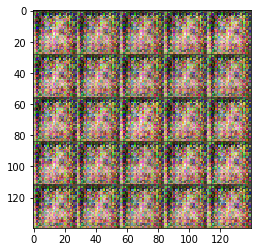

Epoch 1/1, batch 210 Discriminator Loss: 0.7400,  Generator Loss: 2.9088
Epoch 1/1, batch 220 Discriminator Loss: 0.6985,  Generator Loss: 2.7049
Epoch 1/1, batch 230 Discriminator Loss: 1.3877,  Generator Loss: 0.4246
Epoch 1/1, batch 240 Discriminator Loss: 1.2498,  Generator Loss: 0.7106
Epoch 1/1, batch 250 Discriminator Loss: 0.9771,  Generator Loss: 0.9399
Epoch 1/1, batch 260 Discriminator Loss: 1.1749,  Generator Loss: 0.6701
Epoch 1/1, batch 270 Discriminator Loss: 1.5637,  Generator Loss: 2.8805
Epoch 1/1, batch 280 Discriminator Loss: 1.1852,  Generator Loss: 2.1304
Epoch 1/1, batch 290 Discriminator Loss: 0.9830,  Generator Loss: 1.8356
Epoch 1/1, batch 300 Discriminator Loss: 1.0097,  Generator Loss: 0.8429


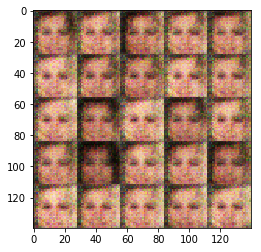

Epoch 1/1, batch 310 Discriminator Loss: 0.9906,  Generator Loss: 2.1590
Epoch 1/1, batch 320 Discriminator Loss: 1.4714,  Generator Loss: 0.5094
Epoch 1/1, batch 330 Discriminator Loss: 1.1627,  Generator Loss: 0.6551
Epoch 1/1, batch 340 Discriminator Loss: 0.9950,  Generator Loss: 0.9064
Epoch 1/1, batch 350 Discriminator Loss: 0.9401,  Generator Loss: 0.8801
Epoch 1/1, batch 360 Discriminator Loss: 1.3849,  Generator Loss: 3.4722
Epoch 1/1, batch 370 Discriminator Loss: 0.8232,  Generator Loss: 1.2930
Epoch 1/1, batch 380 Discriminator Loss: 0.7593,  Generator Loss: 2.1610
Epoch 1/1, batch 390 Discriminator Loss: 1.1921,  Generator Loss: 0.6657
Epoch 1/1, batch 400 Discriminator Loss: 0.8955,  Generator Loss: 1.0434


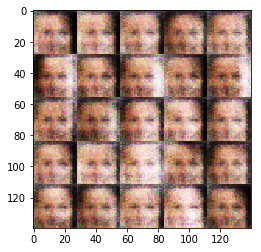

Epoch 1/1, batch 410 Discriminator Loss: 1.0619,  Generator Loss: 0.7524
Epoch 1/1, batch 420 Discriminator Loss: 0.8102,  Generator Loss: 1.4101
Epoch 1/1, batch 430 Discriminator Loss: 1.6054,  Generator Loss: 0.3718
Epoch 1/1, batch 440 Discriminator Loss: 0.8683,  Generator Loss: 1.1297
Epoch 1/1, batch 450 Discriminator Loss: 0.9552,  Generator Loss: 0.9845
Epoch 1/1, batch 460 Discriminator Loss: 1.0567,  Generator Loss: 1.6557
Epoch 1/1, batch 470 Discriminator Loss: 1.2817,  Generator Loss: 2.9249
Epoch 1/1, batch 480 Discriminator Loss: 0.9175,  Generator Loss: 1.7690
Epoch 1/1, batch 490 Discriminator Loss: 0.7797,  Generator Loss: 1.6796
Epoch 1/1, batch 500 Discriminator Loss: 0.7951,  Generator Loss: 1.5831


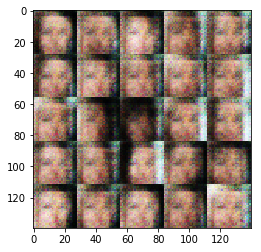

Epoch 1/1, batch 510 Discriminator Loss: 0.9488,  Generator Loss: 1.4277
Epoch 1/1, batch 520 Discriminator Loss: 0.8944,  Generator Loss: 1.9236
Epoch 1/1, batch 530 Discriminator Loss: 0.9727,  Generator Loss: 1.0005
Epoch 1/1, batch 540 Discriminator Loss: 1.2658,  Generator Loss: 0.5399
Epoch 1/1, batch 550 Discriminator Loss: 0.8755,  Generator Loss: 2.7074
Epoch 1/1, batch 560 Discriminator Loss: 0.9785,  Generator Loss: 1.3322
Epoch 1/1, batch 570 Discriminator Loss: 1.2834,  Generator Loss: 0.5290
Epoch 1/1, batch 580 Discriminator Loss: 1.0488,  Generator Loss: 0.8243
Epoch 1/1, batch 590 Discriminator Loss: 1.2669,  Generator Loss: 2.4031
Epoch 1/1, batch 600 Discriminator Loss: 1.1333,  Generator Loss: 0.6462


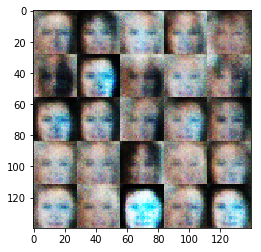

Epoch 1/1, batch 610 Discriminator Loss: 0.9908,  Generator Loss: 1.1370
Epoch 1/1, batch 620 Discriminator Loss: 1.3089,  Generator Loss: 0.5379
Epoch 1/1, batch 630 Discriminator Loss: 1.1239,  Generator Loss: 0.6689
Epoch 1/1, batch 640 Discriminator Loss: 1.3709,  Generator Loss: 0.4364
Epoch 1/1, batch 650 Discriminator Loss: 1.0882,  Generator Loss: 0.7252
Epoch 1/1, batch 660 Discriminator Loss: 1.1880,  Generator Loss: 0.5690
Epoch 1/1, batch 670 Discriminator Loss: 0.8803,  Generator Loss: 1.4609
Epoch 1/1, batch 680 Discriminator Loss: 0.8913,  Generator Loss: 1.2791
Epoch 1/1, batch 690 Discriminator Loss: 1.3378,  Generator Loss: 0.4829
Epoch 1/1, batch 700 Discriminator Loss: 0.9934,  Generator Loss: 0.9197


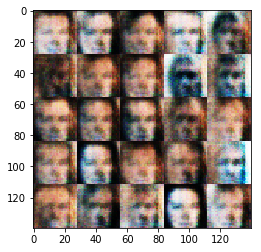

Epoch 1/1, batch 710 Discriminator Loss: 1.0868,  Generator Loss: 0.7037
Epoch 1/1, batch 720 Discriminator Loss: 0.9353,  Generator Loss: 0.9357
Epoch 1/1, batch 730 Discriminator Loss: 0.9370,  Generator Loss: 2.2495
Epoch 1/1, batch 740 Discriminator Loss: 1.0875,  Generator Loss: 0.7023
Epoch 1/1, batch 750 Discriminator Loss: 0.9445,  Generator Loss: 0.9355
Epoch 1/1, batch 760 Discriminator Loss: 0.8115,  Generator Loss: 2.2573
Epoch 1/1, batch 770 Discriminator Loss: 1.1711,  Generator Loss: 0.5971
Epoch 1/1, batch 780 Discriminator Loss: 0.8953,  Generator Loss: 1.2687
Epoch 1/1, batch 790 Discriminator Loss: 0.7719,  Generator Loss: 1.4408
Epoch 1/1, batch 800 Discriminator Loss: 1.2736,  Generator Loss: 0.6055


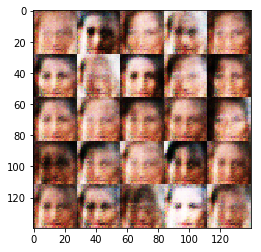

Epoch 1/1, batch 810 Discriminator Loss: 1.2300,  Generator Loss: 3.3105
Epoch 1/1, batch 820 Discriminator Loss: 0.9261,  Generator Loss: 1.5551
Epoch 1/1, batch 830 Discriminator Loss: 1.3951,  Generator Loss: 0.4402
Epoch 1/1, batch 840 Discriminator Loss: 1.1461,  Generator Loss: 0.6267
Epoch 1/1, batch 850 Discriminator Loss: 0.8167,  Generator Loss: 1.8954
Epoch 1/1, batch 860 Discriminator Loss: 1.2946,  Generator Loss: 2.4189
Epoch 1/1, batch 870 Discriminator Loss: 0.9404,  Generator Loss: 1.2788
Epoch 1/1, batch 880 Discriminator Loss: 0.8629,  Generator Loss: 1.2640
Epoch 1/1, batch 890 Discriminator Loss: 0.9101,  Generator Loss: 1.0314
Epoch 1/1, batch 900 Discriminator Loss: 1.1208,  Generator Loss: 1.9535


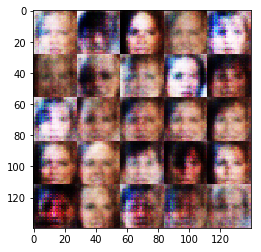

Epoch 1/1, batch 910 Discriminator Loss: 1.0185,  Generator Loss: 1.8351
Epoch 1/1, batch 920 Discriminator Loss: 1.3687,  Generator Loss: 0.4570
Epoch 1/1, batch 930 Discriminator Loss: 1.5354,  Generator Loss: 0.3601
Epoch 1/1, batch 940 Discriminator Loss: 1.3106,  Generator Loss: 0.4918
Epoch 1/1, batch 950 Discriminator Loss: 1.4797,  Generator Loss: 0.4035
Epoch 1/1, batch 960 Discriminator Loss: 0.8555,  Generator Loss: 1.2529
Epoch 1/1, batch 970 Discriminator Loss: 1.2002,  Generator Loss: 0.6297
Epoch 1/1, batch 980 Discriminator Loss: 1.2651,  Generator Loss: 0.5313
Epoch 1/1, batch 990 Discriminator Loss: 1.3547,  Generator Loss: 0.4545
Epoch 1/1, batch 1000 Discriminator Loss: 1.4179,  Generator Loss: 0.4294


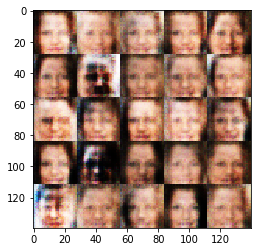

Epoch 1/1, batch 1010 Discriminator Loss: 1.1788,  Generator Loss: 0.6567
Epoch 1/1, batch 1020 Discriminator Loss: 1.1236,  Generator Loss: 0.6904
Epoch 1/1, batch 1030 Discriminator Loss: 1.2231,  Generator Loss: 3.0661
Epoch 1/1, batch 1040 Discriminator Loss: 0.8989,  Generator Loss: 1.1127
Epoch 1/1, batch 1050 Discriminator Loss: 1.1214,  Generator Loss: 0.6639
Epoch 1/1, batch 1060 Discriminator Loss: 0.8593,  Generator Loss: 1.0910
Epoch 1/1, batch 1070 Discriminator Loss: 1.5377,  Generator Loss: 0.3590
Epoch 1/1, batch 1080 Discriminator Loss: 1.1660,  Generator Loss: 0.6117
Epoch 1/1, batch 1090 Discriminator Loss: 1.0754,  Generator Loss: 0.7228
Epoch 1/1, batch 1100 Discriminator Loss: 0.8734,  Generator Loss: 1.2366


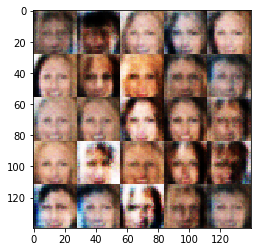

Epoch 1/1, batch 1110 Discriminator Loss: 0.9580,  Generator Loss: 2.0810
Epoch 1/1, batch 1120 Discriminator Loss: 0.9846,  Generator Loss: 2.3258
Epoch 1/1, batch 1130 Discriminator Loss: 1.5594,  Generator Loss: 0.3574
Epoch 1/1, batch 1140 Discriminator Loss: 1.2703,  Generator Loss: 0.5646
Epoch 1/1, batch 1150 Discriminator Loss: 0.9105,  Generator Loss: 1.8285
Epoch 1/1, batch 1160 Discriminator Loss: 1.0243,  Generator Loss: 2.1126
Epoch 1/1, batch 1170 Discriminator Loss: 0.8858,  Generator Loss: 1.2912
Epoch 1/1, batch 1180 Discriminator Loss: 1.0525,  Generator Loss: 0.8203
Epoch 1/1, batch 1190 Discriminator Loss: 0.8475,  Generator Loss: 1.1997
Epoch 1/1, batch 1200 Discriminator Loss: 0.9587,  Generator Loss: 1.2016


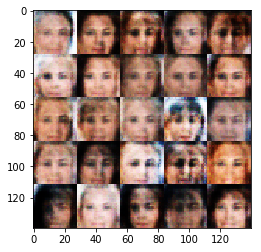

Epoch 1/1, batch 1210 Discriminator Loss: 1.3392,  Generator Loss: 0.4844
Epoch 1/1, batch 1220 Discriminator Loss: 1.4717,  Generator Loss: 0.3969
Epoch 1/1, batch 1230 Discriminator Loss: 1.6329,  Generator Loss: 0.3189
Epoch 1/1, batch 1240 Discriminator Loss: 1.1564,  Generator Loss: 0.6565
Epoch 1/1, batch 1250 Discriminator Loss: 0.9337,  Generator Loss: 1.2380
Epoch 1/1, batch 1260 Discriminator Loss: 1.2434,  Generator Loss: 0.5316
Epoch 1/1, batch 1270 Discriminator Loss: 1.3712,  Generator Loss: 0.4872
Epoch 1/1, batch 1280 Discriminator Loss: 1.2580,  Generator Loss: 0.5217
Epoch 1/1, batch 1290 Discriminator Loss: 1.2618,  Generator Loss: 0.5487
Epoch 1/1, batch 1300 Discriminator Loss: 1.2429,  Generator Loss: 0.5592


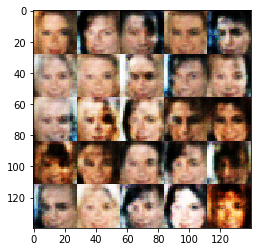

Epoch 1/1, batch 1310 Discriminator Loss: 1.2671,  Generator Loss: 0.5339
Epoch 1/1, batch 1320 Discriminator Loss: 0.8934,  Generator Loss: 2.0408
Epoch 1/1, batch 1330 Discriminator Loss: 0.9933,  Generator Loss: 1.0261
Epoch 1/1, batch 1340 Discriminator Loss: 1.1514,  Generator Loss: 0.6097
Epoch 1/1, batch 1350 Discriminator Loss: 1.2211,  Generator Loss: 0.5983
Epoch 1/1, batch 1360 Discriminator Loss: 1.5721,  Generator Loss: 0.3638
Epoch 1/1, batch 1370 Discriminator Loss: 1.3315,  Generator Loss: 0.4911
Epoch 1/1, batch 1380 Discriminator Loss: 0.9756,  Generator Loss: 0.8798
Epoch 1/1, batch 1390 Discriminator Loss: 1.0784,  Generator Loss: 0.7474
Epoch 1/1, batch 1400 Discriminator Loss: 0.8281,  Generator Loss: 1.3669


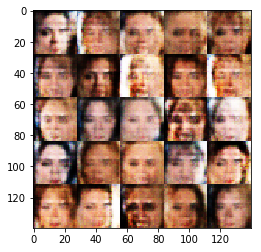

Epoch 1/1, batch 1410 Discriminator Loss: 0.8812,  Generator Loss: 1.0189
Epoch 1/1, batch 1420 Discriminator Loss: 1.0390,  Generator Loss: 2.2395
Epoch 1/1, batch 1430 Discriminator Loss: 0.9334,  Generator Loss: 1.4188
Epoch 1/1, batch 1440 Discriminator Loss: 0.9384,  Generator Loss: 2.1704
Epoch 1/1, batch 1450 Discriminator Loss: 0.9767,  Generator Loss: 1.9131
Epoch 1/1, batch 1460 Discriminator Loss: 1.1005,  Generator Loss: 0.6972
Epoch 1/1, batch 1470 Discriminator Loss: 1.8969,  Generator Loss: 0.2576
Epoch 1/1, batch 1480 Discriminator Loss: 1.5204,  Generator Loss: 3.2467
Epoch 1/1, batch 1490 Discriminator Loss: 0.9891,  Generator Loss: 0.8215
Epoch 1/1, batch 1500 Discriminator Loss: 0.8239,  Generator Loss: 1.5749


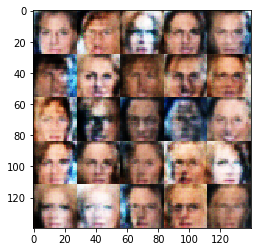

Epoch 1/1, batch 1510 Discriminator Loss: 0.8018,  Generator Loss: 1.7367
Epoch 1/1, batch 1520 Discriminator Loss: 1.1807,  Generator Loss: 2.2966
Epoch 1/1, batch 1530 Discriminator Loss: 1.1390,  Generator Loss: 2.3125
Epoch 1/1, batch 1540 Discriminator Loss: 0.8662,  Generator Loss: 1.3848
Epoch 1/1, batch 1550 Discriminator Loss: 0.8181,  Generator Loss: 1.3936
Epoch 1/1, batch 1560 Discriminator Loss: 1.1931,  Generator Loss: 0.6241
Epoch 1/1, batch 1570 Discriminator Loss: 1.2085,  Generator Loss: 0.5585
Epoch 1/1, batch 1580 Discriminator Loss: 1.2083,  Generator Loss: 0.5735
Epoch 1/1, batch 1590 Discriminator Loss: 1.2147,  Generator Loss: 0.5768
Epoch 1/1, batch 1600 Discriminator Loss: 1.3722,  Generator Loss: 0.4832


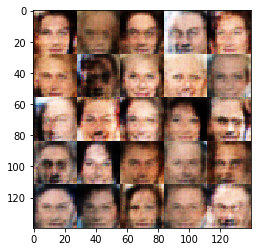

Epoch 1/1, batch 1610 Discriminator Loss: 1.0031,  Generator Loss: 0.7932
Epoch 1/1, batch 1620 Discriminator Loss: 1.0429,  Generator Loss: 0.8035
Epoch 1/1, batch 1630 Discriminator Loss: 0.9833,  Generator Loss: 0.8798
Epoch 1/1, batch 1640 Discriminator Loss: 0.9137,  Generator Loss: 2.0868
Epoch 1/1, batch 1650 Discriminator Loss: 0.9376,  Generator Loss: 1.3417
Epoch 1/1, batch 1660 Discriminator Loss: 1.4402,  Generator Loss: 0.4358
Epoch 1/1, batch 1670 Discriminator Loss: 1.5257,  Generator Loss: 0.3639
Epoch 1/1, batch 1680 Discriminator Loss: 1.0669,  Generator Loss: 0.7263
Epoch 1/1, batch 1690 Discriminator Loss: 0.9512,  Generator Loss: 0.9475
Epoch 1/1, batch 1700 Discriminator Loss: 0.8034,  Generator Loss: 1.6690


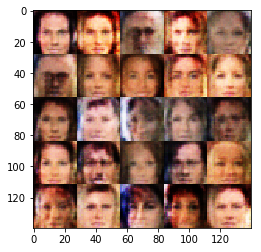

Epoch 1/1, batch 1710 Discriminator Loss: 1.0060,  Generator Loss: 2.4764
Epoch 1/1, batch 1720 Discriminator Loss: 0.8986,  Generator Loss: 1.4810
Epoch 1/1, batch 1730 Discriminator Loss: 0.9874,  Generator Loss: 2.2641
Epoch 1/1, batch 1740 Discriminator Loss: 0.9890,  Generator Loss: 1.6288
Epoch 1/1, batch 1750 Discriminator Loss: 0.8456,  Generator Loss: 1.9402
Epoch 1/1, batch 1760 Discriminator Loss: 0.8978,  Generator Loss: 1.1634
Epoch 1/1, batch 1770 Discriminator Loss: 1.1500,  Generator Loss: 0.6016
Epoch 1/1, batch 1780 Discriminator Loss: 1.3398,  Generator Loss: 0.5121
Epoch 1/1, batch 1790 Discriminator Loss: 0.8380,  Generator Loss: 1.7771
Epoch 1/1, batch 1800 Discriminator Loss: 0.7709,  Generator Loss: 1.7230


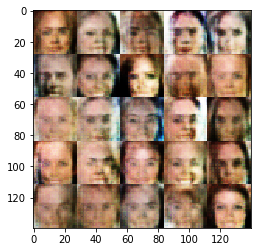

Epoch 1/1, batch 1810 Discriminator Loss: 1.1287,  Generator Loss: 0.6133
Epoch 1/1, batch 1820 Discriminator Loss: 1.6249,  Generator Loss: 0.3116
Epoch 1/1, batch 1830 Discriminator Loss: 1.7078,  Generator Loss: 0.3049
Epoch 1/1, batch 1840 Discriminator Loss: 1.6426,  Generator Loss: 0.3074
Epoch 1/1, batch 1850 Discriminator Loss: 1.3196,  Generator Loss: 0.4833
Epoch 1/1, batch 1860 Discriminator Loss: 0.9151,  Generator Loss: 0.9577
Epoch 1/1, batch 1870 Discriminator Loss: 1.1191,  Generator Loss: 0.6406
Epoch 1/1, batch 1880 Discriminator Loss: 1.0449,  Generator Loss: 0.7260
Epoch 1/1, batch 1890 Discriminator Loss: 0.9031,  Generator Loss: 2.1568
Epoch 1/1, batch 1900 Discriminator Loss: 0.9369,  Generator Loss: 1.5999


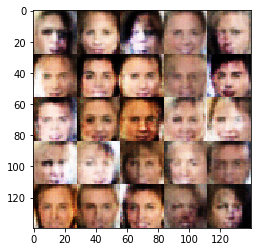

Epoch 1/1, batch 1910 Discriminator Loss: 0.8754,  Generator Loss: 1.2225
Epoch 1/1, batch 1920 Discriminator Loss: 1.2664,  Generator Loss: 2.7931
Epoch 1/1, batch 1930 Discriminator Loss: 1.2606,  Generator Loss: 0.5049
Epoch 1/1, batch 1940 Discriminator Loss: 1.0289,  Generator Loss: 0.7992
Epoch 1/1, batch 1950 Discriminator Loss: 1.6025,  Generator Loss: 0.3362
Epoch 1/1, batch 1960 Discriminator Loss: 1.0290,  Generator Loss: 0.7661
Epoch 1/1, batch 1970 Discriminator Loss: 0.7879,  Generator Loss: 1.3876
Epoch 1/1, batch 1980 Discriminator Loss: 1.2342,  Generator Loss: 0.5420
Epoch 1/1, batch 1990 Discriminator Loss: 1.8850,  Generator Loss: 0.2407
Epoch 1/1, batch 2000 Discriminator Loss: 1.4182,  Generator Loss: 0.4060


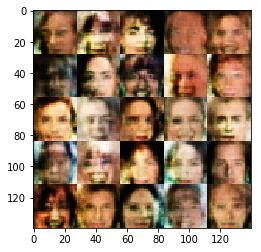

Epoch 1/1, batch 2010 Discriminator Loss: 0.9234,  Generator Loss: 0.9654
Epoch 1/1, batch 2020 Discriminator Loss: 0.8463,  Generator Loss: 1.3569
Epoch 1/1, batch 2030 Discriminator Loss: 1.4502,  Generator Loss: 0.4071
Epoch 1/1, batch 2040 Discriminator Loss: 1.3496,  Generator Loss: 0.4969
Epoch 1/1, batch 2050 Discriminator Loss: 0.8375,  Generator Loss: 1.3352
Epoch 1/1, batch 2060 Discriminator Loss: 0.8639,  Generator Loss: 1.0424
Epoch 1/1, batch 2070 Discriminator Loss: 1.5908,  Generator Loss: 0.3393
Epoch 1/1, batch 2080 Discriminator Loss: 0.9458,  Generator Loss: 0.9260
Epoch 1/1, batch 2090 Discriminator Loss: 1.2098,  Generator Loss: 0.5587
Epoch 1/1, batch 2100 Discriminator Loss: 1.9463,  Generator Loss: 0.2224


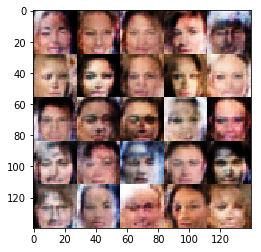

Epoch 1/1, batch 2110 Discriminator Loss: 1.1737,  Generator Loss: 0.6037
Epoch 1/1, batch 2120 Discriminator Loss: 0.8342,  Generator Loss: 1.1837
Epoch 1/1, batch 2130 Discriminator Loss: 0.9646,  Generator Loss: 1.2733
Epoch 1/1, batch 2140 Discriminator Loss: 0.8049,  Generator Loss: 1.4439
Epoch 1/1, batch 2150 Discriminator Loss: 0.9119,  Generator Loss: 1.7665
Epoch 1/1, batch 2160 Discriminator Loss: 1.1957,  Generator Loss: 0.5832
Epoch 1/1, batch 2170 Discriminator Loss: 0.9758,  Generator Loss: 0.8248
Epoch 1/1, batch 2180 Discriminator Loss: 1.2838,  Generator Loss: 0.5081
Epoch 1/1, batch 2190 Discriminator Loss: 0.7953,  Generator Loss: 1.7433
Epoch 1/1, batch 2200 Discriminator Loss: 1.0422,  Generator Loss: 1.9398


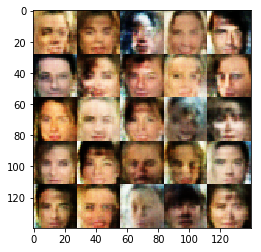

Epoch 1/1, batch 2210 Discriminator Loss: 0.8019,  Generator Loss: 1.2757
Epoch 1/1, batch 2220 Discriminator Loss: 1.0728,  Generator Loss: 0.6906
Epoch 1/1, batch 2230 Discriminator Loss: 0.8369,  Generator Loss: 2.3031
Epoch 1/1, batch 2240 Discriminator Loss: 1.4033,  Generator Loss: 3.3487
Epoch 1/1, batch 2250 Discriminator Loss: 0.9421,  Generator Loss: 0.9017
Epoch 1/1, batch 2260 Discriminator Loss: 0.8349,  Generator Loss: 1.2556
Epoch 1/1, batch 2270 Discriminator Loss: 1.1077,  Generator Loss: 2.4634
Epoch 1/1, batch 2280 Discriminator Loss: 1.1205,  Generator Loss: 2.2651
Epoch 1/1, batch 2290 Discriminator Loss: 1.4104,  Generator Loss: 0.4292
Epoch 1/1, batch 2300 Discriminator Loss: 1.3466,  Generator Loss: 0.4446


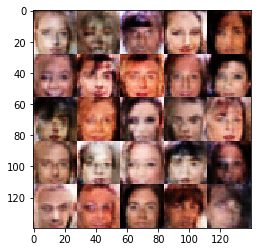

Epoch 1/1, batch 2310 Discriminator Loss: 0.9231,  Generator Loss: 0.9183
Epoch 1/1, batch 2320 Discriminator Loss: 1.1509,  Generator Loss: 0.6418
Epoch 1/1, batch 2330 Discriminator Loss: 1.2108,  Generator Loss: 0.5769
Epoch 1/1, batch 2340 Discriminator Loss: 1.0474,  Generator Loss: 0.7195
Epoch 1/1, batch 2350 Discriminator Loss: 1.0568,  Generator Loss: 0.7357
Epoch 1/1, batch 2360 Discriminator Loss: 0.7348,  Generator Loss: 1.7003
Epoch 1/1, batch 2370 Discriminator Loss: 1.3679,  Generator Loss: 2.5238
Epoch 1/1, batch 2380 Discriminator Loss: 1.0232,  Generator Loss: 2.2197
Epoch 1/1, batch 2390 Discriminator Loss: 1.5912,  Generator Loss: 2.6922
Epoch 1/1, batch 2400 Discriminator Loss: 0.9238,  Generator Loss: 0.9266


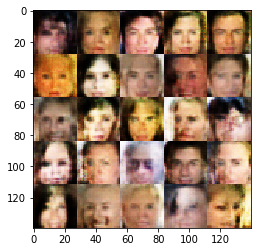

Epoch 1/1, batch 2410 Discriminator Loss: 1.1861,  Generator Loss: 0.6047
Epoch 1/1, batch 2420 Discriminator Loss: 1.1350,  Generator Loss: 2.1857
Epoch 1/1, batch 2430 Discriminator Loss: 1.0831,  Generator Loss: 0.6864
Epoch 1/1, batch 2440 Discriminator Loss: 0.8279,  Generator Loss: 1.1681
Epoch 1/1, batch 2450 Discriminator Loss: 1.3876,  Generator Loss: 0.4288
Epoch 1/1, batch 2460 Discriminator Loss: 0.9019,  Generator Loss: 1.0549
Epoch 1/1, batch 2470 Discriminator Loss: 1.3021,  Generator Loss: 0.5365
Epoch 1/1, batch 2480 Discriminator Loss: 1.7302,  Generator Loss: 0.2735
Epoch 1/1, batch 2490 Discriminator Loss: 1.9343,  Generator Loss: 0.2162
Epoch 1/1, batch 2500 Discriminator Loss: 0.9641,  Generator Loss: 0.8578


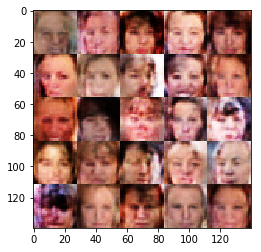

Epoch 1/1, batch 2510 Discriminator Loss: 0.8544,  Generator Loss: 1.2125
Epoch 1/1, batch 2520 Discriminator Loss: 0.8470,  Generator Loss: 1.6052
Epoch 1/1, batch 2530 Discriminator Loss: 1.1821,  Generator Loss: 2.3665
Epoch 1/1, batch 2540 Discriminator Loss: 0.8587,  Generator Loss: 1.5093
Epoch 1/1, batch 2550 Discriminator Loss: 0.8340,  Generator Loss: 1.1188
Epoch 1/1, batch 2560 Discriminator Loss: 0.7880,  Generator Loss: 2.0984
Epoch 1/1, batch 2570 Discriminator Loss: 0.8971,  Generator Loss: 1.1055
Epoch 1/1, batch 2580 Discriminator Loss: 1.0188,  Generator Loss: 0.7936
Epoch 1/1, batch 2590 Discriminator Loss: 1.2945,  Generator Loss: 3.9625
Epoch 1/1, batch 2600 Discriminator Loss: 0.9509,  Generator Loss: 0.8690


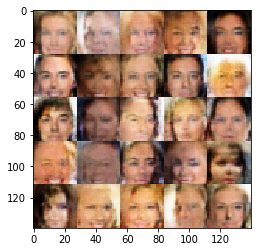

Epoch 1/1, batch 2610 Discriminator Loss: 2.2060,  Generator Loss: 0.1691
Epoch 1/1, batch 2620 Discriminator Loss: 0.9732,  Generator Loss: 0.9368
Epoch 1/1, batch 2630 Discriminator Loss: 1.5959,  Generator Loss: 0.3253
Epoch 1/1, batch 2640 Discriminator Loss: 1.1563,  Generator Loss: 0.6060
Epoch 1/1, batch 2650 Discriminator Loss: 0.7682,  Generator Loss: 1.9839
Epoch 1/1, batch 2660 Discriminator Loss: 1.2444,  Generator Loss: 2.6292
Epoch 1/1, batch 2670 Discriminator Loss: 1.0444,  Generator Loss: 1.4547
Epoch 1/1, batch 2680 Discriminator Loss: 0.8937,  Generator Loss: 0.9799
Epoch 1/1, batch 2690 Discriminator Loss: 1.3657,  Generator Loss: 0.4859
Epoch 1/1, batch 2700 Discriminator Loss: 1.3976,  Generator Loss: 0.4329


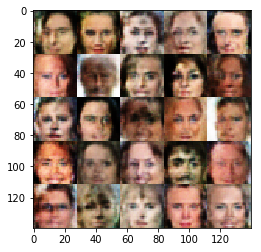

Epoch 1/1, batch 2710 Discriminator Loss: 1.2338,  Generator Loss: 0.5470
Epoch 1/1, batch 2720 Discriminator Loss: 0.9117,  Generator Loss: 1.7726
Epoch 1/1, batch 2730 Discriminator Loss: 1.0468,  Generator Loss: 0.7706
Epoch 1/1, batch 2740 Discriminator Loss: 1.0060,  Generator Loss: 2.6072
Epoch 1/1, batch 2750 Discriminator Loss: 0.8084,  Generator Loss: 1.5633
Epoch 1/1, batch 2760 Discriminator Loss: 1.1413,  Generator Loss: 0.6587
Epoch 1/1, batch 2770 Discriminator Loss: 1.1693,  Generator Loss: 0.5894
Epoch 1/1, batch 2780 Discriminator Loss: 1.1353,  Generator Loss: 0.6321
Epoch 1/1, batch 2790 Discriminator Loss: 1.0420,  Generator Loss: 0.7287
Epoch 1/1, batch 2800 Discriminator Loss: 1.3178,  Generator Loss: 0.4705


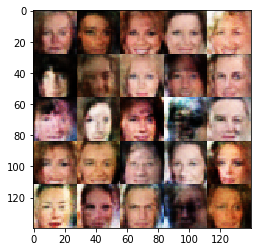

Epoch 1/1, batch 2810 Discriminator Loss: 1.4617,  Generator Loss: 0.3886
Epoch 1/1, batch 2820 Discriminator Loss: 0.7466,  Generator Loss: 2.4649
Epoch 1/1, batch 2830 Discriminator Loss: 0.7743,  Generator Loss: 1.5238
Epoch 1/1, batch 2840 Discriminator Loss: 1.3878,  Generator Loss: 0.4521
Epoch 1/1, batch 2850 Discriminator Loss: 1.5748,  Generator Loss: 0.3281
Epoch 1/1, batch 2860 Discriminator Loss: 1.2022,  Generator Loss: 0.6145
Epoch 1/1, batch 2870 Discriminator Loss: 1.1613,  Generator Loss: 0.6129
Epoch 1/1, batch 2880 Discriminator Loss: 0.8996,  Generator Loss: 0.9491
Epoch 1/1, batch 2890 Discriminator Loss: 0.9540,  Generator Loss: 0.8845
Epoch 1/1, batch 2900 Discriminator Loss: 1.2190,  Generator Loss: 0.5520


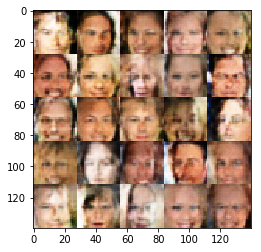

Epoch 1/1, batch 2910 Discriminator Loss: 1.4603,  Generator Loss: 0.4282
Epoch 1/1, batch 2920 Discriminator Loss: 1.2158,  Generator Loss: 2.7261
Epoch 1/1, batch 2930 Discriminator Loss: 0.7841,  Generator Loss: 1.8202
Epoch 1/1, batch 2940 Discriminator Loss: 0.8113,  Generator Loss: 2.1547
Epoch 1/1, batch 2950 Discriminator Loss: 0.7357,  Generator Loss: 1.5458
Epoch 1/1, batch 2960 Discriminator Loss: 0.8800,  Generator Loss: 1.6498
Epoch 1/1, batch 2970 Discriminator Loss: 1.3259,  Generator Loss: 0.4775
Epoch 1/1, batch 2980 Discriminator Loss: 0.9537,  Generator Loss: 1.8840
Epoch 1/1, batch 2990 Discriminator Loss: 1.0433,  Generator Loss: 0.7232
Epoch 1/1, batch 3000 Discriminator Loss: 1.5803,  Generator Loss: 0.3303


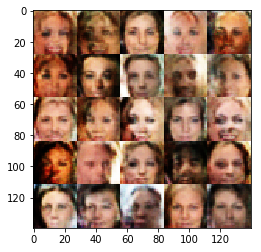

Epoch 1/1, batch 3010 Discriminator Loss: 1.4263,  Generator Loss: 0.4067
Epoch 1/1, batch 3020 Discriminator Loss: 1.1614,  Generator Loss: 0.6032
Epoch 1/1, batch 3030 Discriminator Loss: 0.7046,  Generator Loss: 1.7512
Epoch 1/1, batch 3040 Discriminator Loss: 1.3370,  Generator Loss: 0.4666
Epoch 1/1, batch 3050 Discriminator Loss: 1.4477,  Generator Loss: 0.4152
Epoch 1/1, batch 3060 Discriminator Loss: 0.8945,  Generator Loss: 0.9773
Epoch 1/1, batch 3070 Discriminator Loss: 1.6124,  Generator Loss: 0.3236
Epoch 1/1, batch 3080 Discriminator Loss: 1.9447,  Generator Loss: 0.2202
Epoch 1/1, batch 3090 Discriminator Loss: 1.1477,  Generator Loss: 0.6398
Epoch 1/1, batch 3100 Discriminator Loss: 1.5029,  Generator Loss: 0.3958


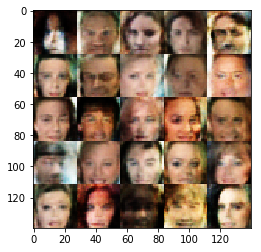

Epoch 1/1, batch 3110 Discriminator Loss: 0.8325,  Generator Loss: 1.1533
Epoch 1/1, batch 3120 Discriminator Loss: 1.4409,  Generator Loss: 0.4063
Epoch 1/1, batch 3130 Discriminator Loss: 1.6983,  Generator Loss: 0.2867
Epoch 1/1, batch 3140 Discriminator Loss: 1.3808,  Generator Loss: 0.4493
Epoch 1/1, batch 3150 Discriminator Loss: 0.8195,  Generator Loss: 1.3225
Epoch 1/1, batch 3160 Discriminator Loss: 1.2416,  Generator Loss: 0.5208
Epoch 1/1, batch 3170 Discriminator Loss: 1.6669,  Generator Loss: 0.3986
Epoch 1/1, batch 3180 Discriminator Loss: 1.0318,  Generator Loss: 0.7391
Epoch 1/1, batch 3190 Discriminator Loss: 0.8547,  Generator Loss: 1.1519
Epoch 1/1, batch 3200 Discriminator Loss: 0.7655,  Generator Loss: 1.4072


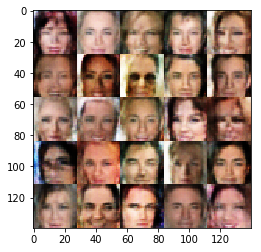

Epoch 1/1, batch 3210 Discriminator Loss: 1.0302,  Generator Loss: 2.2177
Epoch 1/1, batch 3220 Discriminator Loss: 1.3460,  Generator Loss: 3.7318
Epoch 1/1, batch 3230 Discriminator Loss: 0.8191,  Generator Loss: 1.3747
Epoch 1/1, batch 3240 Discriminator Loss: 1.0394,  Generator Loss: 2.3028
Epoch 1/1, batch 3250 Discriminator Loss: 1.1885,  Generator Loss: 0.5905
Epoch 1/1, batch 3260 Discriminator Loss: 0.7331,  Generator Loss: 1.6667
Epoch 1/1, batch 3270 Discriminator Loss: 1.2571,  Generator Loss: 0.5252
Epoch 1/1, batch 3280 Discriminator Loss: 0.7554,  Generator Loss: 1.5269
Epoch 1/1, batch 3290 Discriminator Loss: 1.9058,  Generator Loss: 0.2395
Epoch 1/1, batch 3300 Discriminator Loss: 0.8052,  Generator Loss: 1.2715


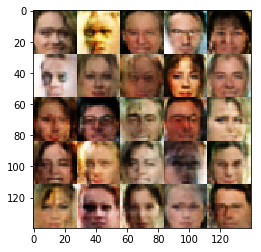

Epoch 1/1, batch 3310 Discriminator Loss: 0.9203,  Generator Loss: 0.9458
Epoch 1/1, batch 3320 Discriminator Loss: 1.7211,  Generator Loss: 0.2932
Epoch 1/1, batch 3330 Discriminator Loss: 2.0388,  Generator Loss: 0.1998
Epoch 1/1, batch 3340 Discriminator Loss: 0.9312,  Generator Loss: 1.9140
Epoch 1/1, batch 3350 Discriminator Loss: 0.7640,  Generator Loss: 1.8135
Epoch 1/1, batch 3360 Discriminator Loss: 1.0874,  Generator Loss: 0.6648
Epoch 1/1, batch 3370 Discriminator Loss: 0.7355,  Generator Loss: 2.0624
Epoch 1/1, batch 3380 Discriminator Loss: 0.8814,  Generator Loss: 1.6493
Epoch 1/1, batch 3390 Discriminator Loss: 0.9230,  Generator Loss: 1.1672
Epoch 1/1, batch 3400 Discriminator Loss: 0.9013,  Generator Loss: 2.5634


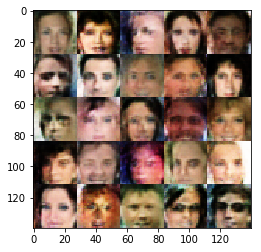

Epoch 1/1, batch 3410 Discriminator Loss: 0.9343,  Generator Loss: 1.4575
Epoch 1/1, batch 3420 Discriminator Loss: 1.3595,  Generator Loss: 2.6507
Epoch 1/1, batch 3430 Discriminator Loss: 0.9017,  Generator Loss: 1.8588
Epoch 1/1, batch 3440 Discriminator Loss: 0.8391,  Generator Loss: 1.0970
Epoch 1/1, batch 3450 Discriminator Loss: 1.3887,  Generator Loss: 0.4524
Epoch 1/1, batch 3460 Discriminator Loss: 0.8906,  Generator Loss: 0.9715
Epoch 1/1, batch 3470 Discriminator Loss: 2.0709,  Generator Loss: 0.1844
Epoch 1/1, batch 3480 Discriminator Loss: 0.9601,  Generator Loss: 2.1288
Epoch 1/1, batch 3490 Discriminator Loss: 0.7870,  Generator Loss: 1.7777
Epoch 1/1, batch 3500 Discriminator Loss: 1.0480,  Generator Loss: 0.7330


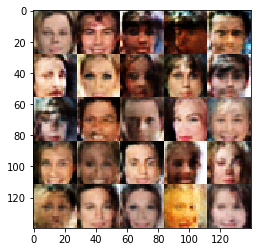

Epoch 1/1, batch 3510 Discriminator Loss: 0.8786,  Generator Loss: 1.0387
Epoch 1/1, batch 3520 Discriminator Loss: 0.9031,  Generator Loss: 2.1679
Epoch 1/1, batch 3530 Discriminator Loss: 1.5602,  Generator Loss: 0.3746
Epoch 1/1, batch 3540 Discriminator Loss: 1.6211,  Generator Loss: 0.3685
Epoch 1/1, batch 3550 Discriminator Loss: 0.8836,  Generator Loss: 1.3765
Epoch 1/1, batch 3560 Discriminator Loss: 1.0263,  Generator Loss: 0.7475
Epoch 1/1, batch 3570 Discriminator Loss: 0.8429,  Generator Loss: 1.1473
Epoch 1/1, batch 3580 Discriminator Loss: 1.1694,  Generator Loss: 2.7997
Epoch 1/1, batch 3590 Discriminator Loss: 0.6821,  Generator Loss: 2.0320
Epoch 1/1, batch 3600 Discriminator Loss: 1.6561,  Generator Loss: 0.3122


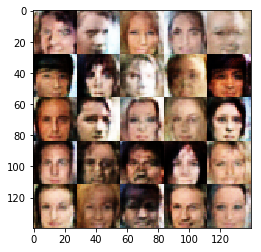

Epoch 1/1, batch 3610 Discriminator Loss: 0.7310,  Generator Loss: 2.1498
Epoch 1/1, batch 3620 Discriminator Loss: 0.7690,  Generator Loss: 1.9459
Epoch 1/1, batch 3630 Discriminator Loss: 1.2097,  Generator Loss: 0.6396
Epoch 1/1, batch 3640 Discriminator Loss: 2.0193,  Generator Loss: 0.2021
Epoch 1/1, batch 3650 Discriminator Loss: 1.2167,  Generator Loss: 0.5578
Epoch 1/1, batch 3660 Discriminator Loss: 1.0488,  Generator Loss: 0.7399
Epoch 1/1, batch 3670 Discriminator Loss: 0.7738,  Generator Loss: 1.4320
Epoch 1/1, batch 3680 Discriminator Loss: 1.5380,  Generator Loss: 0.3880
Epoch 1/1, batch 3690 Discriminator Loss: 1.8434,  Generator Loss: 0.2400
Epoch 1/1, batch 3700 Discriminator Loss: 0.9613,  Generator Loss: 0.8660


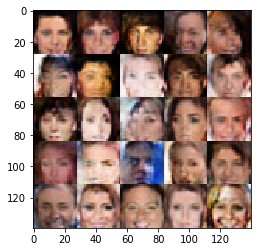

Epoch 1/1, batch 3710 Discriminator Loss: 0.9013,  Generator Loss: 0.9524
Epoch 1/1, batch 3720 Discriminator Loss: 0.9932,  Generator Loss: 2.0987
Epoch 1/1, batch 3730 Discriminator Loss: 0.8399,  Generator Loss: 2.1358
Epoch 1/1, batch 3740 Discriminator Loss: 0.8660,  Generator Loss: 1.8743
Epoch 1/1, batch 3750 Discriminator Loss: 1.1737,  Generator Loss: 2.4147
Epoch 1/1, batch 3760 Discriminator Loss: 1.3287,  Generator Loss: 0.4948
Epoch 1/1, batch 3770 Discriminator Loss: 1.1283,  Generator Loss: 0.6280
Epoch 1/1, batch 3780 Discriminator Loss: 0.7300,  Generator Loss: 1.6960
Epoch 1/1, batch 3790 Discriminator Loss: 0.7817,  Generator Loss: 1.8685
Epoch 1/1, batch 3800 Discriminator Loss: 0.9233,  Generator Loss: 0.9111


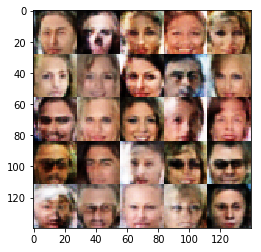

Epoch 1/1, batch 3810 Discriminator Loss: 0.8048,  Generator Loss: 2.4636
Epoch 1/1, batch 3820 Discriminator Loss: 0.9465,  Generator Loss: 0.8578
Epoch 1/1, batch 3830 Discriminator Loss: 1.0975,  Generator Loss: 0.6760
Epoch 1/1, batch 3840 Discriminator Loss: 1.7909,  Generator Loss: 0.2521
Epoch 1/1, batch 3850 Discriminator Loss: 1.6399,  Generator Loss: 0.2915
Epoch 1/1, batch 3860 Discriminator Loss: 1.0929,  Generator Loss: 0.6516
Epoch 1/1, batch 3870 Discriminator Loss: 0.8066,  Generator Loss: 1.6255
Epoch 1/1, batch 3880 Discriminator Loss: 0.8958,  Generator Loss: 1.0343
Epoch 1/1, batch 3890 Discriminator Loss: 1.6361,  Generator Loss: 0.3171
Epoch 1/1, batch 3900 Discriminator Loss: 0.9373,  Generator Loss: 0.9144


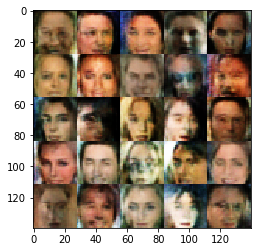

Epoch 1/1, batch 3910 Discriminator Loss: 1.2945,  Generator Loss: 0.5075
Epoch 1/1, batch 3920 Discriminator Loss: 0.7858,  Generator Loss: 1.9045
Epoch 1/1, batch 3930 Discriminator Loss: 1.3002,  Generator Loss: 0.4934
Epoch 1/1, batch 3940 Discriminator Loss: 1.2940,  Generator Loss: 0.4788
Epoch 1/1, batch 3950 Discriminator Loss: 1.1988,  Generator Loss: 0.5852
Epoch 1/1, batch 3960 Discriminator Loss: 1.5326,  Generator Loss: 0.3595
Epoch 1/1, batch 3970 Discriminator Loss: 1.6150,  Generator Loss: 0.3372
Epoch 1/1, batch 3980 Discriminator Loss: 0.7559,  Generator Loss: 1.9166
Epoch 1/1, batch 3990 Discriminator Loss: 0.8688,  Generator Loss: 1.0502
Epoch 1/1, batch 4000 Discriminator Loss: 1.3870,  Generator Loss: 3.0244


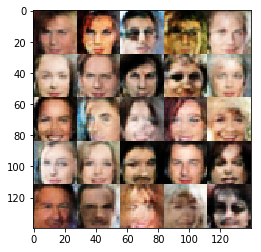

Epoch 1/1, batch 4010 Discriminator Loss: 0.9091,  Generator Loss: 0.9483
Epoch 1/1, batch 4020 Discriminator Loss: 0.9295,  Generator Loss: 1.7845
Epoch 1/1, batch 4030 Discriminator Loss: 1.2833,  Generator Loss: 0.5205
Epoch 1/1, batch 4040 Discriminator Loss: 0.9108,  Generator Loss: 0.9612
Epoch 1/1, batch 4050 Discriminator Loss: 1.3476,  Generator Loss: 0.4674
Epoch 1/1, batch 4060 Discriminator Loss: 1.8187,  Generator Loss: 0.2814
Epoch 1/1, batch 4070 Discriminator Loss: 0.8432,  Generator Loss: 1.1115
Epoch 1/1, batch 4080 Discriminator Loss: 1.0460,  Generator Loss: 2.0528
Epoch 1/1, batch 4090 Discriminator Loss: 0.8233,  Generator Loss: 1.9329
Epoch 1/1, batch 4100 Discriminator Loss: 0.7921,  Generator Loss: 1.2563


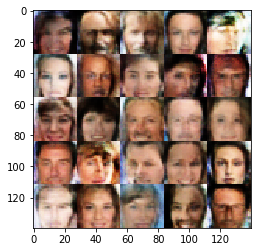

Epoch 1/1, batch 4110 Discriminator Loss: 0.9593,  Generator Loss: 0.8970
Epoch 1/1, batch 4120 Discriminator Loss: 0.9673,  Generator Loss: 0.9360
Epoch 1/1, batch 4130 Discriminator Loss: 1.7793,  Generator Loss: 0.2715
Epoch 1/1, batch 4140 Discriminator Loss: 1.3120,  Generator Loss: 0.5354
Epoch 1/1, batch 4150 Discriminator Loss: 1.4438,  Generator Loss: 0.4083
Epoch 1/1, batch 4160 Discriminator Loss: 0.7751,  Generator Loss: 1.5481
Epoch 1/1, batch 4170 Discriminator Loss: 0.9383,  Generator Loss: 2.3798
Epoch 1/1, batch 4180 Discriminator Loss: 0.8479,  Generator Loss: 2.2249
Epoch 1/1, batch 4190 Discriminator Loss: 0.8780,  Generator Loss: 1.4317
Epoch 1/1, batch 4200 Discriminator Loss: 0.9016,  Generator Loss: 0.9691


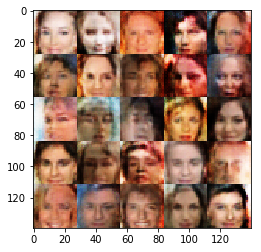

Epoch 1/1, batch 4210 Discriminator Loss: 1.4240,  Generator Loss: 0.4489
Epoch 1/1, batch 4220 Discriminator Loss: 0.9679,  Generator Loss: 1.8206
Epoch 1/1, batch 4230 Discriminator Loss: 0.8173,  Generator Loss: 1.1679
Epoch 1/1, batch 4240 Discriminator Loss: 0.8436,  Generator Loss: 1.2933
Epoch 1/1, batch 4250 Discriminator Loss: 1.0123,  Generator Loss: 0.7488
Epoch 1/1, batch 4260 Discriminator Loss: 0.8737,  Generator Loss: 1.4504
Epoch 1/1, batch 4270 Discriminator Loss: 0.9019,  Generator Loss: 0.9722
Epoch 1/1, batch 4280 Discriminator Loss: 0.7831,  Generator Loss: 1.6234
Epoch 1/1, batch 4290 Discriminator Loss: 0.7264,  Generator Loss: 1.7581
Epoch 1/1, batch 4300 Discriminator Loss: 0.8037,  Generator Loss: 2.2427


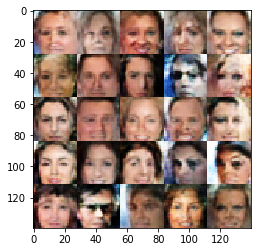

Epoch 1/1, batch 4310 Discriminator Loss: 0.8654,  Generator Loss: 1.9963
Epoch 1/1, batch 4320 Discriminator Loss: 0.9160,  Generator Loss: 1.0329
Epoch 1/1, batch 4330 Discriminator Loss: 1.3778,  Generator Loss: 2.9499
Epoch 1/1, batch 4340 Discriminator Loss: 0.7547,  Generator Loss: 1.3722
Epoch 1/1, batch 4350 Discriminator Loss: 0.8407,  Generator Loss: 1.1504
Epoch 1/1, batch 4360 Discriminator Loss: 1.2692,  Generator Loss: 2.6742
Epoch 1/1, batch 4370 Discriminator Loss: 0.9421,  Generator Loss: 0.8813
Epoch 1/1, batch 4380 Discriminator Loss: 0.8833,  Generator Loss: 0.9882
Epoch 1/1, batch 4390 Discriminator Loss: 0.7602,  Generator Loss: 1.4382
Epoch 1/1, batch 4400 Discriminator Loss: 0.7528,  Generator Loss: 2.4732


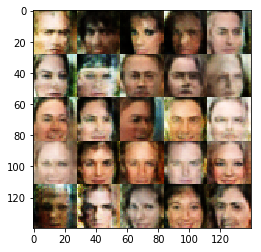

Epoch 1/1, batch 4410 Discriminator Loss: 1.9852,  Generator Loss: 0.2002
Epoch 1/1, batch 4420 Discriminator Loss: 1.1096,  Generator Loss: 0.6613
Epoch 1/1, batch 4430 Discriminator Loss: 1.0215,  Generator Loss: 0.7525
Epoch 1/1, batch 4440 Discriminator Loss: 0.7404,  Generator Loss: 1.6750
Epoch 1/1, batch 4450 Discriminator Loss: 1.4224,  Generator Loss: 0.4647
Epoch 1/1, batch 4460 Discriminator Loss: 1.3109,  Generator Loss: 0.5273
Epoch 1/1, batch 4470 Discriminator Loss: 0.8750,  Generator Loss: 1.0775
Epoch 1/1, batch 4480 Discriminator Loss: 0.8301,  Generator Loss: 1.1652
Epoch 1/1, batch 4490 Discriminator Loss: 0.7428,  Generator Loss: 1.5437
Epoch 1/1, batch 4500 Discriminator Loss: 1.8038,  Generator Loss: 3.8451


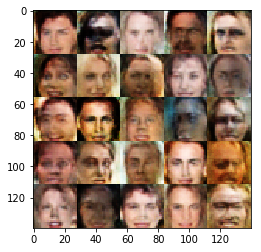

Epoch 1/1, batch 4510 Discriminator Loss: 0.7825,  Generator Loss: 1.3857
Epoch 1/1, batch 4520 Discriminator Loss: 1.4070,  Generator Loss: 2.3508
Epoch 1/1, batch 4530 Discriminator Loss: 0.9068,  Generator Loss: 0.9505
Epoch 1/1, batch 4540 Discriminator Loss: 1.0358,  Generator Loss: 0.7237
Epoch 1/1, batch 4550 Discriminator Loss: 0.7329,  Generator Loss: 1.7081
Epoch 1/1, batch 4560 Discriminator Loss: 2.1924,  Generator Loss: 0.1969
Epoch 1/1, batch 4570 Discriminator Loss: 0.9239,  Generator Loss: 0.9509
Epoch 1/1, batch 4580 Discriminator Loss: 0.7601,  Generator Loss: 1.8728
Epoch 1/1, batch 4590 Discriminator Loss: 0.7825,  Generator Loss: 2.3199
Epoch 1/1, batch 4600 Discriminator Loss: 0.8517,  Generator Loss: 1.2910


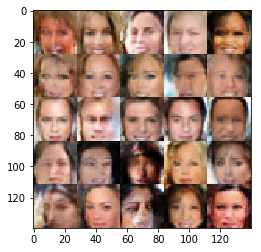

Epoch 1/1, batch 4610 Discriminator Loss: 0.7484,  Generator Loss: 1.3713
Epoch 1/1, batch 4620 Discriminator Loss: 0.8092,  Generator Loss: 1.2253
Epoch 1/1, batch 4630 Discriminator Loss: 1.2864,  Generator Loss: 0.5202
Epoch 1/1, batch 4640 Discriminator Loss: 0.8444,  Generator Loss: 1.0828
Epoch 1/1, batch 4650 Discriminator Loss: 0.7961,  Generator Loss: 1.4704
Epoch 1/1, batch 4660 Discriminator Loss: 0.8088,  Generator Loss: 2.0073
Epoch 1/1, batch 4670 Discriminator Loss: 0.8613,  Generator Loss: 2.4751
Epoch 1/1, batch 4680 Discriminator Loss: 0.7291,  Generator Loss: 1.6003
Epoch 1/1, batch 4690 Discriminator Loss: 0.7472,  Generator Loss: 1.4143
Epoch 1/1, batch 4700 Discriminator Loss: 0.7940,  Generator Loss: 1.5042


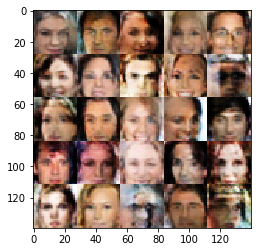

Epoch 1/1, batch 4710 Discriminator Loss: 0.9450,  Generator Loss: 0.8677
Epoch 1/1, batch 4720 Discriminator Loss: 0.7481,  Generator Loss: 1.6498
Epoch 1/1, batch 4730 Discriminator Loss: 1.4059,  Generator Loss: 2.4422
Epoch 1/1, batch 4740 Discriminator Loss: 0.8765,  Generator Loss: 1.0327
Epoch 1/1, batch 4750 Discriminator Loss: 0.7694,  Generator Loss: 1.6444
Epoch 1/1, batch 4760 Discriminator Loss: 1.0921,  Generator Loss: 2.6435
Epoch 1/1, batch 4770 Discriminator Loss: 1.0018,  Generator Loss: 0.8491
Epoch 1/1, batch 4780 Discriminator Loss: 0.7425,  Generator Loss: 1.5872
Epoch 1/1, batch 4790 Discriminator Loss: 0.7294,  Generator Loss: 1.6593
Epoch 1/1, batch 4800 Discriminator Loss: 1.0147,  Generator Loss: 0.7635


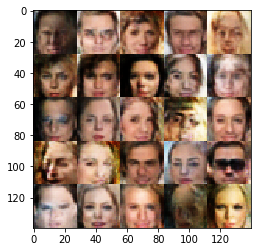

Epoch 1/1, batch 4810 Discriminator Loss: 0.8276,  Generator Loss: 1.6593
Epoch 1/1, batch 4820 Discriminator Loss: 0.8264,  Generator Loss: 1.6737
Epoch 1/1, batch 4830 Discriminator Loss: 0.9751,  Generator Loss: 0.8371
Epoch 1/1, batch 4840 Discriminator Loss: 0.7746,  Generator Loss: 2.1497
Epoch 1/1, batch 4850 Discriminator Loss: 0.8620,  Generator Loss: 1.5914
Epoch 1/1, batch 4860 Discriminator Loss: 0.9280,  Generator Loss: 1.3897
Epoch 1/1, batch 4870 Discriminator Loss: 0.8251,  Generator Loss: 1.6565
Epoch 1/1, batch 4880 Discriminator Loss: 1.8248,  Generator Loss: 0.2596
Epoch 1/1, batch 4890 Discriminator Loss: 0.8432,  Generator Loss: 1.0914
Epoch 1/1, batch 4900 Discriminator Loss: 1.0931,  Generator Loss: 0.6615


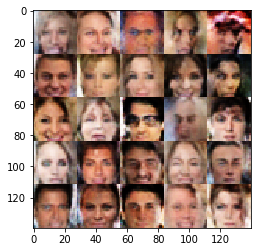

Epoch 1/1, batch 4910 Discriminator Loss: 1.1066,  Generator Loss: 0.6902
Epoch 1/1, batch 4920 Discriminator Loss: 1.9627,  Generator Loss: 0.2149
Epoch 1/1, batch 4930 Discriminator Loss: 0.8044,  Generator Loss: 1.4409
Epoch 1/1, batch 4940 Discriminator Loss: 0.8577,  Generator Loss: 1.5465
Epoch 1/1, batch 4950 Discriminator Loss: 0.8172,  Generator Loss: 1.4151
Epoch 1/1, batch 4960 Discriminator Loss: 0.8385,  Generator Loss: 1.2154
Epoch 1/1, batch 4970 Discriminator Loss: 0.9540,  Generator Loss: 2.1375
Epoch 1/1, batch 4980 Discriminator Loss: 0.8064,  Generator Loss: 1.3372
Epoch 1/1, batch 4990 Discriminator Loss: 0.8760,  Generator Loss: 2.3604
Epoch 1/1, batch 5000 Discriminator Loss: 1.5422,  Generator Loss: 0.3968


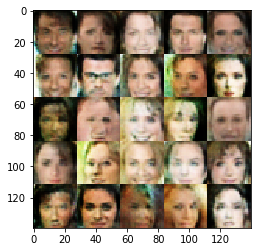

Epoch 1/1, batch 5010 Discriminator Loss: 0.7807,  Generator Loss: 1.6124
Epoch 1/1, batch 5020 Discriminator Loss: 1.4772,  Generator Loss: 0.4150
Epoch 1/1, batch 5030 Discriminator Loss: 0.9199,  Generator Loss: 0.9018
Epoch 1/1, batch 5040 Discriminator Loss: 1.1504,  Generator Loss: 0.6062
Epoch 1/1, batch 5050 Discriminator Loss: 1.0036,  Generator Loss: 0.7890
Epoch 1/1, batch 5060 Discriminator Loss: 1.4339,  Generator Loss: 0.5690
Epoch 1/1, batch 5070 Discriminator Loss: 1.2005,  Generator Loss: 2.8988
Epoch 1/1, batch 5080 Discriminator Loss: 1.2608,  Generator Loss: 0.4914
Epoch 1/1, batch 5090 Discriminator Loss: 0.9411,  Generator Loss: 0.8655
Epoch 1/1, batch 5100 Discriminator Loss: 1.4243,  Generator Loss: 0.4231


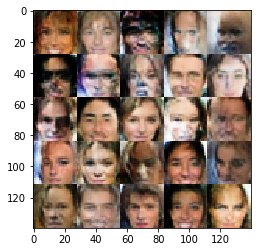

Epoch 1/1, batch 5110 Discriminator Loss: 1.0646,  Generator Loss: 0.7194
Epoch 1/1, batch 5120 Discriminator Loss: 1.5763,  Generator Loss: 0.3315
Epoch 1/1, batch 5130 Discriminator Loss: 0.8683,  Generator Loss: 1.0359
Epoch 1/1, batch 5140 Discriminator Loss: 0.7497,  Generator Loss: 1.5778
Epoch 1/1, batch 5150 Discriminator Loss: 0.9091,  Generator Loss: 1.8378
Epoch 1/1, batch 5160 Discriminator Loss: 1.0020,  Generator Loss: 0.7742
Epoch 1/1, batch 5170 Discriminator Loss: 1.0938,  Generator Loss: 0.7205
Epoch 1/1, batch 5180 Discriminator Loss: 0.7234,  Generator Loss: 2.4478
Epoch 1/1, batch 5190 Discriminator Loss: 1.6088,  Generator Loss: 0.3152
Epoch 1/1, batch 5200 Discriminator Loss: 1.4644,  Generator Loss: 0.3971


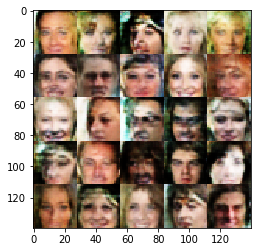

Epoch 1/1, batch 5210 Discriminator Loss: 1.4641,  Generator Loss: 0.4105
Epoch 1/1, batch 5220 Discriminator Loss: 1.3861,  Generator Loss: 0.4518
Epoch 1/1, batch 5230 Discriminator Loss: 1.0741,  Generator Loss: 0.6868
Epoch 1/1, batch 5240 Discriminator Loss: 0.8772,  Generator Loss: 2.6875
Epoch 1/1, batch 5250 Discriminator Loss: 0.7855,  Generator Loss: 1.9396
Epoch 1/1, batch 5260 Discriminator Loss: 0.8066,  Generator Loss: 2.1765
Epoch 1/1, batch 5270 Discriminator Loss: 0.8627,  Generator Loss: 1.0736
Epoch 1/1, batch 5280 Discriminator Loss: 0.7850,  Generator Loss: 2.0460
Epoch 1/1, batch 5290 Discriminator Loss: 0.7380,  Generator Loss: 1.5607
Epoch 1/1, batch 5300 Discriminator Loss: 0.7448,  Generator Loss: 1.4398


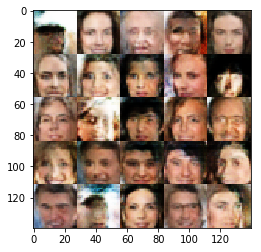

Epoch 1/1, batch 5310 Discriminator Loss: 0.7492,  Generator Loss: 1.3982
Epoch 1/1, batch 5320 Discriminator Loss: 1.0080,  Generator Loss: 0.7928
Epoch 1/1, batch 5330 Discriminator Loss: 0.7862,  Generator Loss: 1.7316
Epoch 1/1, batch 5340 Discriminator Loss: 0.9598,  Generator Loss: 2.7610
Epoch 1/1, batch 5350 Discriminator Loss: 0.9336,  Generator Loss: 0.8955
Epoch 1/1, batch 5360 Discriminator Loss: 0.9524,  Generator Loss: 2.5152
Epoch 1/1, batch 5370 Discriminator Loss: 0.9067,  Generator Loss: 0.9494
Epoch 1/1, batch 5380 Discriminator Loss: 0.8109,  Generator Loss: 2.0464
Epoch 1/1, batch 5390 Discriminator Loss: 1.1314,  Generator Loss: 3.0570
Epoch 1/1, batch 5400 Discriminator Loss: 0.7913,  Generator Loss: 1.2338


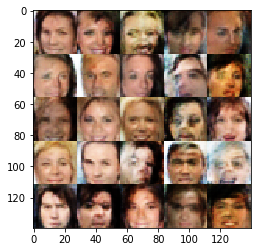

Epoch 1/1, batch 5410 Discriminator Loss: 1.0293,  Generator Loss: 3.1720
Epoch 1/1, batch 5420 Discriminator Loss: 0.9094,  Generator Loss: 0.9489
Epoch 1/1, batch 5430 Discriminator Loss: 0.7606,  Generator Loss: 1.5135
Epoch 1/1, batch 5440 Discriminator Loss: 0.8454,  Generator Loss: 1.8802
Epoch 1/1, batch 5450 Discriminator Loss: 0.7946,  Generator Loss: 1.4882
Epoch 1/1, batch 5460 Discriminator Loss: 0.9512,  Generator Loss: 1.4340
Epoch 1/1, batch 5470 Discriminator Loss: 1.1866,  Generator Loss: 0.6009
Epoch 1/1, batch 5480 Discriminator Loss: 0.8813,  Generator Loss: 2.4652
Epoch 1/1, batch 5490 Discriminator Loss: 1.2734,  Generator Loss: 0.5005
Epoch 1/1, batch 5500 Discriminator Loss: 1.6591,  Generator Loss: 0.3003


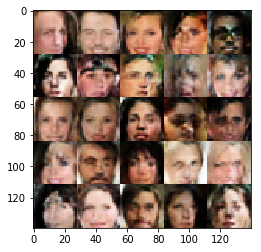

Epoch 1/1, batch 5510 Discriminator Loss: 1.8617,  Generator Loss: 0.2658
Epoch 1/1, batch 5520 Discriminator Loss: 0.9705,  Generator Loss: 0.8204
Epoch 1/1, batch 5530 Discriminator Loss: 0.8354,  Generator Loss: 1.1067
Epoch 1/1, batch 5540 Discriminator Loss: 1.6283,  Generator Loss: 0.3267
Epoch 1/1, batch 5550 Discriminator Loss: 1.0028,  Generator Loss: 0.8120
Epoch 1/1, batch 5560 Discriminator Loss: 1.3587,  Generator Loss: 0.4696
Epoch 1/1, batch 5570 Discriminator Loss: 1.3119,  Generator Loss: 0.4957
Epoch 1/1, batch 5580 Discriminator Loss: 0.8566,  Generator Loss: 1.2257
Epoch 1/1, batch 5590 Discriminator Loss: 1.8655,  Generator Loss: 0.2608
Epoch 1/1, batch 5600 Discriminator Loss: 0.7655,  Generator Loss: 1.8002


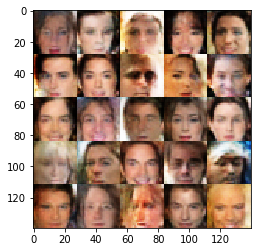

Epoch 1/1, batch 5610 Discriminator Loss: 0.9177,  Generator Loss: 0.9509
Epoch 1/1, batch 5620 Discriminator Loss: 0.7902,  Generator Loss: 1.2728
Epoch 1/1, batch 5630 Discriminator Loss: 1.0501,  Generator Loss: 0.7387
Epoch 1/1, batch 5640 Discriminator Loss: 0.8195,  Generator Loss: 1.1894
Epoch 1/1, batch 5650 Discriminator Loss: 1.6026,  Generator Loss: 0.3707
Epoch 1/1, batch 5660 Discriminator Loss: 0.8277,  Generator Loss: 1.1933
Epoch 1/1, batch 5670 Discriminator Loss: 1.0871,  Generator Loss: 0.6782
Epoch 1/1, batch 5680 Discriminator Loss: 0.8271,  Generator Loss: 1.4751
Epoch 1/1, batch 5690 Discriminator Loss: 0.7298,  Generator Loss: 1.8389
Epoch 1/1, batch 5700 Discriminator Loss: 0.8964,  Generator Loss: 1.0140


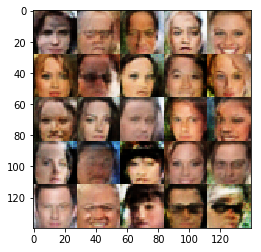

Epoch 1/1, batch 5710 Discriminator Loss: 0.8628,  Generator Loss: 2.5331
Epoch 1/1, batch 5720 Discriminator Loss: 0.7414,  Generator Loss: 1.4822
Epoch 1/1, batch 5730 Discriminator Loss: 0.7499,  Generator Loss: 2.0683
Epoch 1/1, batch 5740 Discriminator Loss: 1.1126,  Generator Loss: 0.7467
Epoch 1/1, batch 5750 Discriminator Loss: 0.8469,  Generator Loss: 3.0044
Epoch 1/1, batch 5760 Discriminator Loss: 0.7847,  Generator Loss: 1.3130
Epoch 1/1, batch 5770 Discriminator Loss: 0.7274,  Generator Loss: 2.2795
Epoch 1/1, batch 5780 Discriminator Loss: 1.7905,  Generator Loss: 3.6904
Epoch 1/1, batch 5790 Discriminator Loss: 0.9593,  Generator Loss: 0.8657
Epoch 1/1, batch 5800 Discriminator Loss: 1.4022,  Generator Loss: 0.4245


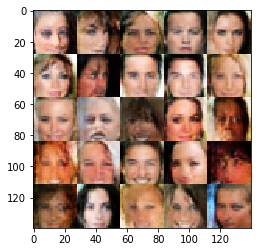

Epoch 1/1, batch 5810 Discriminator Loss: 1.6918,  Generator Loss: 0.3037
Epoch 1/1, batch 5820 Discriminator Loss: 0.7711,  Generator Loss: 1.5175
Epoch 1/1, batch 5830 Discriminator Loss: 0.9752,  Generator Loss: 2.4175
Epoch 1/1, batch 5840 Discriminator Loss: 1.1955,  Generator Loss: 0.5553
Epoch 1/1, batch 5850 Discriminator Loss: 0.7854,  Generator Loss: 1.2475
Epoch 1/1, batch 5860 Discriminator Loss: 1.2306,  Generator Loss: 3.2699
Epoch 1/1, batch 5870 Discriminator Loss: 0.8226,  Generator Loss: 1.1298
Epoch 1/1, batch 5880 Discriminator Loss: 0.8330,  Generator Loss: 1.0854
Epoch 1/1, batch 5890 Discriminator Loss: 0.7559,  Generator Loss: 1.9816
Epoch 1/1, batch 5900 Discriminator Loss: 0.9123,  Generator Loss: 0.9075


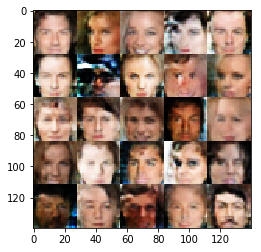

Epoch 1/1, batch 5910 Discriminator Loss: 0.8762,  Generator Loss: 1.0636
Epoch 1/1, batch 5920 Discriminator Loss: 1.3153,  Generator Loss: 3.2212
Epoch 1/1, batch 5930 Discriminator Loss: 1.0113,  Generator Loss: 0.8362
Epoch 1/1, batch 5940 Discriminator Loss: 2.0417,  Generator Loss: 0.2488
Epoch 1/1, batch 5950 Discriminator Loss: 1.4836,  Generator Loss: 0.3767
Epoch 1/1, batch 5960 Discriminator Loss: 0.9400,  Generator Loss: 0.8788
Epoch 1/1, batch 5970 Discriminator Loss: 1.7821,  Generator Loss: 0.2754
Epoch 1/1, batch 5980 Discriminator Loss: 1.9865,  Generator Loss: 0.2159
Epoch 1/1, batch 5990 Discriminator Loss: 0.8981,  Generator Loss: 0.9412
Epoch 1/1, batch 6000 Discriminator Loss: 0.9017,  Generator Loss: 1.0073


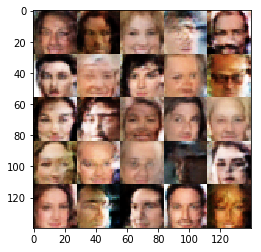

Epoch 1/1, batch 6010 Discriminator Loss: 1.1224,  Generator Loss: 2.4561
Epoch 1/1, batch 6020 Discriminator Loss: 0.9054,  Generator Loss: 0.9478
Epoch 1/1, batch 6030 Discriminator Loss: 2.2299,  Generator Loss: 0.1446
Epoch 1/1, batch 6040 Discriminator Loss: 0.7246,  Generator Loss: 1.9629
Epoch 1/1, batch 6050 Discriminator Loss: 1.1300,  Generator Loss: 0.6234
Epoch 1/1, batch 6060 Discriminator Loss: 0.8757,  Generator Loss: 0.9836
Epoch 1/1, batch 6070 Discriminator Loss: 1.1191,  Generator Loss: 0.6686
Epoch 1/1, batch 6080 Discriminator Loss: 1.6123,  Generator Loss: 0.3454
Epoch 1/1, batch 6090 Discriminator Loss: 1.7001,  Generator Loss: 0.3064
Epoch 1/1, batch 6100 Discriminator Loss: 0.8833,  Generator Loss: 0.9961


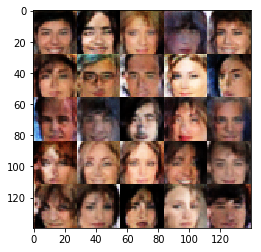

Epoch 1/1, batch 6110 Discriminator Loss: 0.8689,  Generator Loss: 2.4527
Epoch 1/1, batch 6120 Discriminator Loss: 1.0540,  Generator Loss: 0.7173
Epoch 1/1, batch 6130 Discriminator Loss: 0.8015,  Generator Loss: 2.9674
Epoch 1/1, batch 6140 Discriminator Loss: 1.8274,  Generator Loss: 0.2866
Epoch 1/1, batch 6150 Discriminator Loss: 1.4079,  Generator Loss: 0.4266
Epoch 1/1, batch 6160 Discriminator Loss: 0.8931,  Generator Loss: 0.9782
Epoch 1/1, batch 6170 Discriminator Loss: 1.8893,  Generator Loss: 0.2509
Epoch 1/1, batch 6180 Discriminator Loss: 0.7397,  Generator Loss: 1.8255
Epoch 1/1, batch 6190 Discriminator Loss: 0.9962,  Generator Loss: 0.7918
Epoch 1/1, batch 6200 Discriminator Loss: 1.4012,  Generator Loss: 0.4463


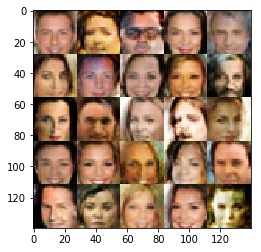

Epoch 1/1, batch 6210 Discriminator Loss: 0.8329,  Generator Loss: 1.8795
Epoch 1/1, batch 6220 Discriminator Loss: 1.3105,  Generator Loss: 0.4770
Epoch 1/1, batch 6230 Discriminator Loss: 0.8328,  Generator Loss: 1.1397
Epoch 1/1, batch 6240 Discriminator Loss: 1.0993,  Generator Loss: 0.6430
Epoch 1/1, batch 6250 Discriminator Loss: 1.4341,  Generator Loss: 3.5005
Epoch 1/1, batch 6260 Discriminator Loss: 1.0924,  Generator Loss: 0.6684
Epoch 1/1, batch 6270 Discriminator Loss: 1.1717,  Generator Loss: 0.5749
Epoch 1/1, batch 6280 Discriminator Loss: 1.0624,  Generator Loss: 0.7716
Epoch 1/1, batch 6290 Discriminator Loss: 0.9615,  Generator Loss: 0.8485
Epoch 1/1, batch 6300 Discriminator Loss: 1.3180,  Generator Loss: 0.4801


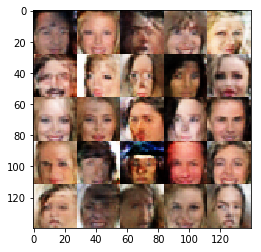

Epoch 1/1, batch 6310 Discriminator Loss: 1.2428,  Generator Loss: 0.5199
Epoch 1/1, batch 6320 Discriminator Loss: 2.1424,  Generator Loss: 0.1706
Epoch 1/1, batch 6330 Discriminator Loss: 0.8554,  Generator Loss: 1.0779


In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.